<a href="https://colab.research.google.com/github/pamolowo/Hamoye_data_science/blob/main/Machine_Learning_Algorithm_for_Prediction_of_Economic_Remittance_A_comparative_Model_Approach_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install xgboost
!pip install squarify
!pip install geopandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import seaborn as sns
import squarify
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import geopandas as gpd




In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/personal_remittances_paid_current_US$_2/personal_remittances_paid_current_US$_2.csv')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/personal_remittances_paid_current_US$_2/personal_remittances_paid_current_US$_2.csv')
df.head(5)

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                             Indicator Name     Indicator Code  1960  1961  \
0  Personal remittances, paid (current US$)  BM.TRF.PWKR.CD.DT   NaN   NaN   
1  Personal remittances, paid (current US$)  BM.TRF.PWKR.CD.DT   NaN   NaN   
2  Personal remittances, paid (current US$)  BM.TRF.PWKR.CD.DT   NaN   NaN   
3  Personal remittances, paid (current US$)  BM.TRF.PWKR.CD.DT   NaN   NaN   
4  Personal remittances, paid (current US$)  BM.TRF.PWKR.CD.DT   NaN   NaN   

   1962  1963  1964  1965  ...          2014          2015          2016  \
0   NaN   NaN   NaN   NaN  ...  1.010553e+08  1.012275e+08  9.805334e+07   
1   NaN   NaN   NaN   NaN  ...  6.397281e+09  5.086995e+09  4.369787e+09   
2   NaN   NaN   NaN   NaN  ...  5.241635e+08  2.289918e+08  1.678945e+08   
3   NaN   NaN   NaN   NaN  ...  2.963446e+09  6.049161e+09  4.979108e+09   
4   NaN   NaN   NaN   NaN  ...  2.746616e+09  1.252909e+09  1.176110e+09   

           2017          2018          2019          2020          2021  \
0  1.080456e+08  1.116510e+08  1.126276e+08  1.017626e+08  1.113316e+08   
1  4.634461e+09  5.066609e+09  4.861944e+09  4.983910e+09  5.224661e+09   
2  1.439791e+08  2.346187e+08  2.172923e+08  2.254206e+08           NaN   
3  3.922327e+09  3.928024e+09  3.631313e+09  3.781300e+09  3.514929e+09   
4  9.614153e+08  6.816270e+08  5.490820e+08  5.764714e+08  4.454001e+08   

           2022  2023  
0  1.103610e+08   NaN  
1  4.037309e+09   NaN  
2           NaN   NaN  
3  3.404153e+09   NaN  
4  5.176682e+08   NaN  

[5 rows x 68 columns]

In [ ]:
df3 = pd.read_excel('/content/drive/MyDrive/ColabNotebooks/Knomad/inward_remittance_flows_december_2023_1.xlsx')
df3.head(5)

Remittance inflows (US$ million)   2000   2001    2002        2003  \
0                      Afghanistan    0.0    0.0    0.00    0.000000   
1                          Albania  597.8  699.3  733.57  888.748582   
2                          Algeria    0.0    0.0    0.00    0.000000   
3                   American Samoa    NaN    NaN     NaN         NaN   
4                          Andorra    0.0    0.0    0.00    0.000000   

          2004         2005         2006         2007         2008  ...  \
0     0.000000     0.000000     0.000000     0.000000    89.500000  ...   
1  1160.672105  1289.704316  1359.467325  1468.020000  1865.600000  ...   
2     0.000000   170.000000   189.000000    99.004563   103.631887  ...   
3          NaN          NaN          NaN          NaN          NaN  ...   
4     0.000000     0.000000     0.000000     0.000000     0.000000  ...   

          2015         2016         2017         2018         2019  \
0   348.624717   627.710802   822.731630   803.546454   828.571904   
1  1290.863508  1306.009167  1311.822432  1458.210056  1472.812242   
2  1997.393458  1989.023597  1791.887073  1984.998399  1785.838683   
3          NaN          NaN          NaN          NaN          NaN   
4     0.000000     0.000000     0.000000     0.000000    21.100000   

          2020         2021         2022   2023e  % of GDP in 2023  
0   788.917115   320.000000   370.000000   300.0          2.007898  
1  1465.987212  1718.355918  1745.245136  1970.0          8.553317  
2  1699.608935  1792.158957  1658.975810  1770.0          0.790179  
3          NaN          NaN          NaN     NaN               NaN  
4    47.416324    53.001418     0.000000     0.0          0.000000  

[5 rows x 26 columns]

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Remittance inflows (US$ million)  224 non-null    object 
 1   2000                              199 non-null    float64
 2   2001                              199 non-null    float64
 3   2002                              199 non-null    float64
 4   2003                              199 non-null    float64
 5   2004                              199 non-null    float64
 6   2005                              199 non-null    float64
 7   2006                              199 non-null    float64
 8   2007                              198 non-null    float64
 9   2008                              198 non-null    float64
 10  2009                              198 non-null    float64
 11  2010                              198 non-null    float64
 12  2011    

In [ ]:

# List of country names in df
country_names_df = df['Country Name']
print(country_names_df)


0                            Aruba
1      Africa Eastern and Southern
2                      Afghanistan
3       Africa Western and Central
4                           Angola
                  ...             
261                         Kosovo
262                    Yemen, Rep.
263                   South Africa
264                         Zambia
265                       Zimbabwe
Name: Country Name, Length: 266, dtype: object


In [ ]:
# List of country names in df3
country_names_df3 = df3['Remittance inflows (US$ million)']
print(country_names_df3)


0                                            Afghanistan
1                                                Albania
2                                                Algeria
3                                         American Samoa
4                                                Andorra
                             ...                        
221    For additional information, please also see "I...
222             GDP data from IMF World Economic Outlook
223    For latest data and analysis on migration and ...
224                                  Date: December 2023
225    When using the data, please cite: World Bank-K...
Name: Remittance inflows (US$ million), Length: 226, dtype: object


In [ ]:
# Find common countries in both DataFrames
common_countries = set(country_names_df).intersection(set(country_names_df3))
print(common_countries)


{'Slovenia', 'North Macedonia', 'Costa Rica', 'Yemen, Rep.', 'Georgia', 'Honduras', 'French Polynesia', 'Kiribati', 'Liberia', 'Samoa', 'Sao Tome and Principe', 'St. Kitts and Nevis', 'Malaysia', 'Lebanon', 'Indonesia', 'Mexico', 'Iraq', 'Ireland', 'Switzerland', 'Turkmenistan', 'Uruguay', 'Palau', 'Andorra', 'Burkina Faso', 'Chile', 'Lithuania', 'Suriname', 'United Kingdom', 'Albania', 'Bosnia and Herzegovina', 'St. Lucia', 'Estonia', 'Greece', 'Azerbaijan', 'Grenada', 'Greenland', 'Japan', 'Australia', 'Germany', 'Isle of Man', 'Macao SAR, China', 'Poland', 'Tunisia', 'Liechtenstein', 'Ukraine', 'Cyprus', 'Belarus', 'Nepal', 'Niger', 'Denmark', 'Malawi', 'St. Vincent and the Grenadines', 'Turks and Caicos Islands', 'Ghana', 'Mauritius', 'Congo, Rep.', 'Myanmar', 'Serbia', 'Antigua and Barbuda', "Cote d'Ivoire", 'Dominica', 'Maldives', 'Austria', 'Luxembourg', 'Jamaica', 'Bermuda', 'San Marino', 'Central African Republic', 'France', 'Kyrgyz Republic', 'Benin', 'Puerto Rico', 'New Cale

In [ ]:


# Step 1: Identify the common countries in both DataFrames
common_countries = set(df['Country Name']).intersection(set(df3['Remittance inflows (US$ million)']))

# Step 2: Filter both DataFrames to only include the common countries
df_filtered = df[df['Country Name'].isin(common_countries)].copy()
df3_filtered = df3[df3['Remittance inflows (US$ million)'].isin(common_countries)].copy()

# Step 3: Sort both DataFrames by the country name
df_filtered = df_filtered.sort_values(by='Country Name').reset_index(drop=True)
df3_filtered = df3_filtered.sort_values(by='Remittance inflows (US$ million)').reset_index(drop=True)

# View the filtered DataFrames
print("Filtered df:")
print(df_filtered)

print("Filtered df3:")
print(df3_filtered)



Filtered df:
              Country Name Country Code  \
0              Afghanistan          AFG   
1                  Albania          ALB   
2                  Algeria          DZA   
3           American Samoa          ASM   
4                  Andorra          AND   
..                     ...          ...   
201  Virgin Islands (U.S.)          VIR   
202     West Bank and Gaza          PSE   
203                  World          WLD   
204            Yemen, Rep.          YEM   
205                 Zambia          ZMB   

                               Indicator Name     Indicator Code  1960  1961  \
0    Personal remittances, paid (current US$)  BM.TRF.PWKR.CD.DT   NaN   NaN   
1    Personal remittances, paid (current US$)  BM.TRF.PWKR.CD.DT   NaN   NaN   
2    Personal remittances, paid (current US$)  BM.TRF.PWKR.CD.DT   NaN   NaN   
3    Personal remittances, paid (current US$)  BM.TRF.PWKR.CD.DT   NaN   NaN   
4    Personal remittances, paid (current US$)  BM.TRF.PWKR.CD.DT   NaN

In [ ]:
df_filtered.head(5)

Country Name Country Code                            Indicator Name  \
0     Afghanistan          AFG  Personal remittances, paid (current US$)   
1         Albania          ALB  Personal remittances, paid (current US$)   
2         Algeria          DZA  Personal remittances, paid (current US$)   
3  American Samoa          ASM  Personal remittances, paid (current US$)   
4         Andorra          AND  Personal remittances, paid (current US$)   

      Indicator Code  1960  1961  1962  1963  1964  1965  ...         2014  \
0  BM.TRF.PWKR.CD.DT   NaN   NaN   NaN   NaN   NaN   NaN  ...  524163478.5   
1  BM.TRF.PWKR.CD.DT   NaN   NaN   NaN   NaN   NaN   NaN  ...  178722842.2   
2  BM.TRF.PWKR.CD.DT   NaN   NaN   NaN   NaN   NaN   NaN  ...  295922112.1   
3  BM.TRF.PWKR.CD.DT   NaN   NaN   NaN   NaN   NaN   NaN  ...          NaN   
4  BM.TRF.PWKR.CD.DT   NaN   NaN   NaN   NaN   NaN   NaN  ...          NaN   

           2015          2016         2017          2018          2019  \
0  2.289918e+08  1.678945e+08  143979106.2  2.346187e+08  2.172923e+08   
1  1.533124e+08  1.471568e+08  106330982.9  1.148793e+08  1.196796e+08   
2  7.212899e+07  7.663350e+07  214378056.7  8.700638e+07  8.154536e+07   
3           NaN           NaN          NaN           NaN           NaN   
4           NaN           NaN          NaN           NaN  9.148485e+07   

           2020          2021          2022  2023  
0  2.254206e+08           NaN           NaN   NaN  
1  1.246304e+08  1.403443e+08  1.494897e+08   NaN  
2  1.492535e+08  8.325932e+07  6.022160e+07   NaN  
3           NaN           NaN           NaN   NaN  
4  8.380427e+07  7.051409e+07  1.238833e+08   NaN  

[5 rows x 68 columns]

In [ ]:
df3_filtered.head(5)

Remittance inflows (US$ million)   2000   2001    2002        2003  \
0                      Afghanistan    0.0    0.0    0.00    0.000000   
1                          Albania  597.8  699.3  733.57  888.748582   
2                          Algeria    0.0    0.0    0.00    0.000000   
3                   American Samoa    NaN    NaN     NaN         NaN   
4                          Andorra    0.0    0.0    0.00    0.000000   

          2004         2005         2006         2007         2008  ...  \
0     0.000000     0.000000     0.000000     0.000000    89.500000  ...   
1  1160.672105  1289.704316  1359.467325  1468.020000  1865.600000  ...   
2     0.000000   170.000000   189.000000    99.004563   103.631887  ...   
3          NaN          NaN          NaN          NaN          NaN  ...   
4     0.000000     0.000000     0.000000     0.000000     0.000000  ...   

          2015         2016         2017         2018         2019  \
0   348.624717   627.710802   822.731630   803.546454   828.571904   
1  1290.863508  1306.009167  1311.822432  1458.210056  1472.812242   
2  1997.393458  1989.023597  1791.887073  1984.998399  1785.838683   
3          NaN          NaN          NaN          NaN          NaN   
4     0.000000     0.000000     0.000000     0.000000    21.100000   

          2020         2021         2022   2023e  % of GDP in 2023  
0   788.917115   320.000000   370.000000   300.0          2.007898  
1  1465.987212  1718.355918  1745.245136  1970.0          8.553317  
2  1699.608935  1792.158957  1658.975810  1770.0          0.790179  
3          NaN          NaN          NaN     NaN               NaN  
4    47.416324    53.001418     0.000000     0.0          0.000000  

[5 rows x 26 columns]

In [ ]:
df = df_filtered
df3 = df3_filtered

In [ ]:
print(df['Country Name'].unique())

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt, Arab Rep.'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Polynesia'
 'Gabon' 'Gambia, The' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Greenland'
 'Grenada' 'Guam' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'Hong

In [ ]:
print(df3['Remittance inflows (US$ million)'].unique())

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt, Arab Rep.'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Polynesia'
 'Gabon' 'Gambia, The' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Greenland'
 'Grenada' 'Guam' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'Hong

In [ ]:
df.shape, df3.shape

((206, 68), (206, 26))

In [ ]:
df3 = df3.rename(columns ={'Remittance inflows (US$ million)' :'Country Name'})
df3.head(5)

Country Name   2000   2001    2002        2003         2004         2005  \
0     Afghanistan    0.0    0.0    0.00    0.000000     0.000000     0.000000   
1         Albania  597.8  699.3  733.57  888.748582  1160.672105  1289.704316   
2         Algeria    0.0    0.0    0.00    0.000000     0.000000   170.000000   
3  American Samoa    NaN    NaN     NaN         NaN          NaN          NaN   
4         Andorra    0.0    0.0    0.00    0.000000     0.000000     0.000000   

          2006         2007         2008  ...         2015         2016  \
0     0.000000     0.000000    89.500000  ...   348.624717   627.710802   
1  1359.467325  1468.020000  1865.600000  ...  1290.863508  1306.009167   
2   189.000000    99.004563   103.631887  ...  1997.393458  1989.023597   
3          NaN          NaN          NaN  ...          NaN          NaN   
4     0.000000     0.000000     0.000000  ...     0.000000     0.000000   

          2017         2018         2019         2020         2021  \
0   822.731630   803.546454   828.571904   788.917115   320.000000   
1  1311.822432  1458.210056  1472.812242  1465.987212  1718.355918   
2  1791.887073  1984.998399  1785.838683  1699.608935  1792.158957   
3          NaN          NaN          NaN          NaN          NaN   
4     0.000000     0.000000    21.100000    47.416324    53.001418   

          2022   2023e  % of GDP in 2023  
0   370.000000   300.0          2.007898  
1  1745.245136  1970.0          8.553317  
2  1658.975810  1770.0          0.790179  
3          NaN     NaN               NaN  
4     0.000000     0.0          0.000000  

[5 rows x 26 columns]

In [ ]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    206 non-null    object 
 1   Country Code    206 non-null    object 
 2   Indicator Name  206 non-null    object 
 3   Indicator Code  206 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            11 non-null     float64
 15  1971            16 non-null     float64
 16  1972            17 non-null     float64
 17  1973            17 non-null     flo

In [ ]:
missing = df.isna().sum()
list(missing)

[0,
 0,
 0,
 0,
 206,
 206,
 206,
 206,
 206,
 206,
 206,
 206,
 206,
 206,
 195,
 190,
 189,
 189,
 181,
 166,
 147,
 133,
 126,
 122,
 112,
 111,
 107,
 108,
 109,
 106,
 102,
 100,
 101,
 101,
 99,
 99,
 97,
 88,
 82,
 78,
 74,
 70,
 67,
 66,
 66,
 63,
 57,
 53,
 50,
 44,
 40,
 38,
 38,
 34,
 34,
 31,
 30,
 31,
 28,
 29,
 30,
 33,
 34,
 34,
 33,
 35,
 48,
 206]

In [ ]:
df["Indicator Name"].unique()

array(['Personal remittances, paid (current US$)'], dtype=object)

In [ ]:
df["Indicator Code"].unique()

array(['BM.TRF.PWKR.CD.DT'], dtype=object)

In [ ]:
df.shape

(206, 68)

In [ ]:
# List of columns to drop
columns_to_drop = ['Country Code', "Indicator Name", "Indicator Code", '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '2023']

# Drop columns by their positions
df = df.drop(columns=columns_to_drop)

In [ ]:
# Alternatively, you can use iloc
#df = df.iloc[:, [i for i in range(len(df.columns)) if i not in columns_to_drop]]

# Print the DataFrame after dropping columns
df.head(10)

Country Name  1970  1971  1972  1973  1974  1975  1976         1977  \
0          Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
1              Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
2              Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN  83920974.73   
3       American Samoa   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
4              Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
5               Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
6  Antigua and Barbuda   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
7            Argentina   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
8              Armenia   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
9                Aruba   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN   

          1978  ...          2013          2014          2015          2016  \
0          NaN  ...  4.447308e+08  5.241635e+08  2.289918e+08  1.678945e+08   
1          NaN  ...  1.905513e+08  1.787228e+08  1.533124e+08  1.471568e+08   
2  112963012.7  ...  3.871581e+07  2.959221e+08  7.212899e+07  7.663350e+07   
3          NaN  ...           NaN           NaN           NaN           NaN   
4          NaN  ...           NaN           NaN           NaN           NaN   
5          NaN  ...  2.395966e+09  2.746616e+09  1.252909e+09  1.176110e+09   
6          NaN  ...  4.924888e+07  5.208836e+07  5.282264e+07  5.474293e+07   
7   16000000.0  ...  8.878035e+08  7.324146e+08  6.850014e+08  7.692421e+08   
8          NaN  ...  3.552979e+08  3.905900e+08  3.637885e+08  3.580155e+08   
9          NaN  ...  9.660064e+07  1.010553e+08  1.012275e+08  9.805334e+07   

           2017          2018          2019          2020          2021  \
0  1.439791e+08  2.346187e+08  2.172923e+08  2.254206e+08           NaN   
1  1.063310e+08  1.148793e+08  1.196796e+08  1.246304e+08  1.403443e+08   
2  2.143781e+08  8.700638e+07  8.154536e+07  1.492535e+08  8.325932e+07   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN  9.148485e+07  8.380427e+07  7.051409e+07   
5  9.614153e+08  6.816270e+08  5.490820e+08  5.764714e+08  4.454001e+08   
6  5.544539e+07  5.417427e+07  4.755158e+07  4.415826e+07  5.212411e+07   
7  1.060485e+09  1.010376e+09  6.699323e+08  5.210406e+08  5.968991e+08   
8  3.674964e+08  3.412626e+08  3.626718e+08  3.043656e+08  3.527756e+08   
9  1.080456e+08  1.116510e+08  1.126276e+08  1.017626e+08  1.113316e+08   

           2022  
0           NaN  
1  1.494897e+08  
2  6.022160e+07  
3           NaN  
4  1.238833e+08  
5  5.176682e+08  
6  5.599575e+07  
7  5.904123e+08  
8  6.054405e+08  
9  1.103610e+08  

[10 rows x 54 columns]

In [ ]:
df.columns

Index(['Country Name', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')

In [ ]:
df_zero = df.fillna(0)
df_zero.head(10)


Country Name  1970  1971  1972  1973  1974  1975  1976         1977  \
0          Afghanistan   0.0   0.0   0.0   0.0   0.0   0.0   0.0         0.00   
1              Albania   0.0   0.0   0.0   0.0   0.0   0.0   0.0         0.00   
2              Algeria   0.0   0.0   0.0   0.0   0.0   0.0   0.0  83920974.73   
3       American Samoa   0.0   0.0   0.0   0.0   0.0   0.0   0.0         0.00   
4              Andorra   0.0   0.0   0.0   0.0   0.0   0.0   0.0         0.00   
5               Angola   0.0   0.0   0.0   0.0   0.0   0.0   0.0         0.00   
6  Antigua and Barbuda   0.0   0.0   0.0   0.0   0.0   0.0   0.0         0.00   
7            Argentina   0.0   0.0   0.0   0.0   0.0   0.0   0.0         0.00   
8              Armenia   0.0   0.0   0.0   0.0   0.0   0.0   0.0         0.00   
9                Aruba   0.0   0.0   0.0   0.0   0.0   0.0   0.0         0.00   

          1978  ...          2013          2014          2015          2016  \
0          0.0  ...  4.447308e+08  5.241635e+08  2.289918e+08  1.678945e+08   
1          0.0  ...  1.905513e+08  1.787228e+08  1.533124e+08  1.471568e+08   
2  112963012.7  ...  3.871581e+07  2.959221e+08  7.212899e+07  7.663350e+07   
3          0.0  ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
4          0.0  ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
5          0.0  ...  2.395966e+09  2.746616e+09  1.252909e+09  1.176110e+09   
6          0.0  ...  4.924888e+07  5.208836e+07  5.282264e+07  5.474293e+07   
7   16000000.0  ...  8.878035e+08  7.324146e+08  6.850014e+08  7.692421e+08   
8          0.0  ...  3.552979e+08  3.905900e+08  3.637885e+08  3.580155e+08   
9          0.0  ...  9.660064e+07  1.010553e+08  1.012275e+08  9.805334e+07   

           2017          2018          2019          2020          2021  \
0  1.439791e+08  2.346187e+08  2.172923e+08  2.254206e+08  0.000000e+00   
1  1.063310e+08  1.148793e+08  1.196796e+08  1.246304e+08  1.403443e+08   
2  2.143781e+08  8.700638e+07  8.154536e+07  1.492535e+08  8.325932e+07   
3  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
4  0.000000e+00  0.000000e+00  9.148485e+07  8.380427e+07  7.051409e+07   
5  9.614153e+08  6.816270e+08  5.490820e+08  5.764714e+08  4.454001e+08   
6  5.544539e+07  5.417427e+07  4.755158e+07  4.415826e+07  5.212411e+07   
7  1.060485e+09  1.010376e+09  6.699323e+08  5.210406e+08  5.968991e+08   
8  3.674964e+08  3.412626e+08  3.626718e+08  3.043656e+08  3.527756e+08   
9  1.080456e+08  1.116510e+08  1.126276e+08  1.017626e+08  1.113316e+08   

           2022  
0  0.000000e+00  
1  1.494897e+08  
2  6.022160e+07  
3  0.000000e+00  
4  1.238833e+08  
5  5.176682e+08  
6  5.599575e+07  
7  5.904123e+08  
8  6.054405e+08  
9  1.103610e+08  

[10 rows x 54 columns]

<ipython-input-29-6809148571ba>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


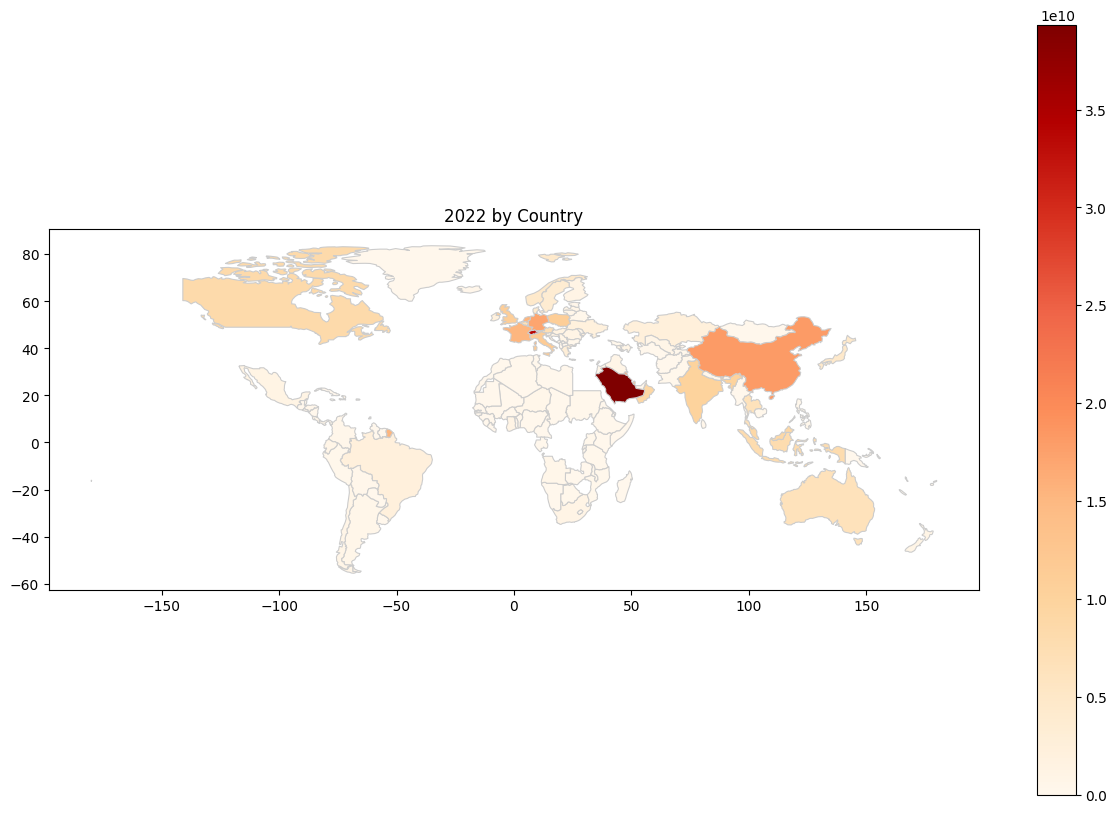

In [ ]:
# Sample data preparation (assuming 'df_zero' is your DataFrame and 'Country Name' and '2023e' columns exist)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Ensure 'Country Name' in df_zero matches 'name' in the world GeoDataFrame
df_zero = df_zero.rename(columns={'Country Name': 'name'})

# Merge the data with the world map
merged = world.set_index('name').join(df_zero.set_index('name'))

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='2022', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('2022 by Country')
plt.show()


In [ ]:
# Load the 'naturalearth_lowres' data directly from the downloaded file

#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Ensure 'Country Name' in df_zero matches 'name' in the world GeoDataFrame
#df_map = df_zero.rename(index={'Country Name': 'name'})

# Merge the data with the world map
#merged = world.set_index('name').join(df_map.set_index('name'))

# List of years to loop through
years = [str(year) for year in range(1970, 2023)]

# Plotting
fig, axes = plt.subplots(nrows=27, ncols=2, figsize=(30, 216))
axes = axes.flatten()

for idx, year in enumerate(years):
    ax = axes[idx]
    merged.plot(column=year, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(f'{year} by Country')
    ax.axis('off')

# Hide any extra subplots
for ax in axes[len(years):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df_zero.head(5)

name  1970  1971  1972  1973  1974  1975  1976         1977  \
0     Afghanistan   0.0   0.0   0.0   0.0   0.0   0.0   0.0         0.00   
1         Albania   0.0   0.0   0.0   0.0   0.0   0.0   0.0         0.00   
2         Algeria   0.0   0.0   0.0   0.0   0.0   0.0   0.0  83920974.73   
3  American Samoa   0.0   0.0   0.0   0.0   0.0   0.0   0.0         0.00   
4         Andorra   0.0   0.0   0.0   0.0   0.0   0.0   0.0         0.00   

          1978  ...         2013         2014          2015          2016  \
0          0.0  ...  444730790.5  524163478.5  2.289918e+08  1.678945e+08   
1          0.0  ...  190551293.6  178722842.2  1.533124e+08  1.471568e+08   
2  112963012.7  ...   38715810.2  295922112.1  7.212899e+07  7.663350e+07   
3          0.0  ...          0.0          0.0  0.000000e+00  0.000000e+00   
4          0.0  ...          0.0          0.0  0.000000e+00  0.000000e+00   

          2017          2018          2019          2020          2021  \
0  143979106.2  2.346187e+08  2.172923e+08  2.254206e+08  0.000000e+00   
1  106330982.9  1.148793e+08  1.196796e+08  1.246304e+08  1.403443e+08   
2  214378056.7  8.700638e+07  8.154536e+07  1.492535e+08  8.325932e+07   
3          0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
4          0.0  0.000000e+00  9.148485e+07  8.380427e+07  7.051409e+07   

           2022  
0  0.000000e+00  
1  1.494897e+08  
2  6.022160e+07  
3  0.000000e+00  
4  1.238833e+08  

[5 rows x 54 columns]

In [ ]:
df_zero.index=df_zero['name']
df_zero.index.names = ['name']
df_zero.columns.names = ['Year']
df_zero = df_zero.drop('name', axis=1)
df_zero.head(5)
#df = df.dropna(axis=0, how='all')

Year            1970  1971  1972  1973  1974  1975  1976         1977  \
name                                                                    
Afghanistan      0.0   0.0   0.0   0.0   0.0   0.0   0.0         0.00   
Albania          0.0   0.0   0.0   0.0   0.0   0.0   0.0         0.00   
Algeria          0.0   0.0   0.0   0.0   0.0   0.0   0.0  83920974.73   
American Samoa   0.0   0.0   0.0   0.0   0.0   0.0   0.0         0.00   
Andorra          0.0   0.0   0.0   0.0   0.0   0.0   0.0         0.00   

Year                   1978         1979  ...         2013         2014  \
name                                      ...                             
Afghanistan             0.0          0.0  ...  444730790.5  524163478.5   
Albania                 0.0          0.0  ...  190551293.6  178722842.2   
Algeria         112963012.7  130798111.0  ...   38715810.2  295922112.1   
American Samoa          0.0          0.0  ...          0.0          0.0   
Andorra                 0.0          0.0  ...          0.0          0.0   

Year                    2015          2016         2017          2018  \
name                                                                    
Afghanistan     2.289918e+08  1.678945e+08  143979106.2  2.346187e+08   
Albania         1.533124e+08  1.471568e+08  106330982.9  1.148793e+08   
Algeria         7.212899e+07  7.663350e+07  214378056.7  8.700638e+07   
American Samoa  0.000000e+00  0.000000e+00          0.0  0.000000e+00   
Andorra         0.000000e+00  0.000000e+00          0.0  0.000000e+00   

Year                    2019          2020          2021          2022  
name                                                                    
Afghanistan     2.172923e+08  2.254206e+08  0.000000e+00  0.000000e+00  
Albania         1.196796e+08  1.246304e+08  1.403443e+08  1.494897e+08  
Algeria         8.154536e+07  1.492535e+08  8.325932e+07  6.022160e+07  
American Samoa  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
Andorra         9.148485e+07  8.380427e+07  7.051409e+07  1.238833e+08  

[5 rows x 53 columns]

In [ ]:

# Assuming 'df_zero' has countries as index and years as columns.

# Define the size of the overall figure.
# Adjust the figsize to accommodate the number of plots.
fig = plt.figure(figsize=(12, 8 * 53))  # 53 years, one plot per year

# Loop through the years 1970 to 2022.
for i, year in enumerate(range(1970, 2023)):
    # Get the top 20 countries by the current year for better visualization.
    # Replace non-positive values with a small positive number to avoid ZeroDivisionError.
    top_20 = df_zero.replace(to_replace=0, value=0.01).nlargest(20, str(year))

    # Create a subplot for each year.
    ax = fig.add_subplot(53, 1, i+1)

    # Generate a treemap for the top 20 countries of the current year.
    # Ensure that 'top_20[str(year)]' does not contain zero or negative values.
    squarify.plot(sizes=top_20[str(year)], label=top_20.index, alpha=0.8, ax=ax)

    # Set the title for the current treemap.
    ax.set_title(f'Treemap of Top 20 Countries by {year}')

    # Remove the axes for a cleaner look.
    ax.axis('off')

# Adjust the layout to prevent overlap.
plt.tight_layout()

# Show the plot.
plt.show()



In [ ]:
df_zero.head(5)


In [ ]:
import matplotlib.pyplot as plt

# Loop through the years 1970 to 2022.
for year in range(1970, 2023):
    # Get the top 10 countries by the current year for better visualization.
    top_10 = df_zero.nlargest(10, str(year))

    # Create a pie chart for the top 10 countries of the current year.
    plt.figure(figsize=(12, 8))  # Increase figure size
    patches, texts, autotexts = plt.pie(top_10[str(year)], autopct='%1.0f%%', startangle=140)

    # Improve legibility of autopct
    for autotext in autotexts:
        autotext.set_color('white')

    # Add a legend outside of the pie chart
    plt.legend(patches, top_10.index, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f'Pie Chart of Top 10 Countries by {year}')
    plt.show()




In [ ]:

# Assuming 'df_zero' is your DataFrame and you want to compare a few selected columns
sns.pairplot(df_zero[['1970', '1980', '1990', '2000', '2010', '2020',]])
plt.show()

In [ ]:
# Assuming 'df_zero' is your DataFrame and you want to compare a few selected columns
sns.pairplot(df_zero[['1975', '1985', '1995', '2005', '2015', '2022',]])
plt.show()

In [ ]:
# Get a list of all countries in the DataFrame.
countries = df_zero.index.tolist()

# Define the categories (years) you want to plot.
categories = [str(year) for year in range(1970, 2023)]

# Number of variables we're plotting.
num_vars = len(categories)

# Compute angle for each category.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Create a radar chart for each country.
for country in countries:
    values = df_zero.loc[country, categories].tolist()
    values += values[:1]  # Complete the loop

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)

    # Labels for each point in the radar chart.
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=8)  # You may adjust the size as needed

    # Remove the y-tick labels.
    ax.set_yticklabels([])

    # Title of the radar chart.
    plt.title(f'Radar Chart for {country}')

    # Display the plot.
    plt.show()


In [ ]:
df_zero.shape

In [ ]:
df3_zero = df3.fillna(0)
df3_zero.tail(10)

In [ ]:

n = 15
length = len(df_zero)
sns.set_style('dark', {'axes.facecolor':'white'})
f, axes = plt.subplots(n, 1, figsize=(16, 100))
cycol = cycle('bgrcmky')
cymak = cycle('-:')
cymker = cycle('vo*.,s')
labels = df_zero.columns.values
x = range(len(df_zero.columns))

for i in range(n):
    if i == 0:
        plt.sca(axes[0])
        countrynames = df_zero.index[:round(length / n)]
        for country in countrynames:
            plt.bar(x, df_zero.loc[country].values, color=next(cycol), label=country)
        plt.title('Remittance Money Inflow into Countries of the World', fontsize=30)
        plt.xticks(x, labels, rotation='vertical')
        plt.ylabel('US$ million', fontsize=20)
        plt.xlabel('Year', fontsize=8)
        plt.legend(loc='upper left', prop={'size': 10})
    elif i == n - 1:
        plt.sca(axes[n - 1])
        countrynames = df_zero.index[round(length / n * (n - 1)):]
        for country in countrynames:
            plt.bar(x, df_zero.loc[country].values, color=next(cycol), label=country)
        plt.ylabel('US$ million', fontsize=20)
        plt.xlabel('Year', fontsize=8)
        plt.xticks(x, labels, rotation='vertical')
        plt.legend(loc='upper left', prop={'size': 10})
    else:
        plt.sca(axes[i])
        countrynames = df_zero.index[round(length / n * i):round(length / n * (i + 1))]
        for country in countrynames:
            plt.bar(x, df_zero.loc[country].values, color=next(cycol), label=country)
        plt.ylabel('US$ million', fontsize=20)
        plt.xlabel('Year', fontsize=8)
        plt.xticks(x, labels, rotation='vertical')
        plt.legend(loc='upper left', prop={'size': 10})

plt.tight_layout()
plt.show()

In [ ]:

n = 15
length = len(df_zero)
sns.set_style('dark', {'axes.facecolor':'white'})
f, axes = plt.subplots(n, 1, figsize=(16, 100))
cycol = cycle('bgrcmky')
cymak = cycle('-:')
cymker = cycle('vo*.,s')
labels = df_zero.columns.values
x = range(len(df_zero.columns))

for i in range(n):
    if i == 0:
        plt.sca(axes[0])
        countrynames = df_zero.index[:round(length / n)]
        for country in countrynames:
            plt.plot(df_zero.loc[country].values, color=next(cycol), linestyle=next(cymak), marker=next(cymker), label=country)
        plt.title('Remittance Money Inflow into Countries of the World', fontsize=30)
        plt.xticks(x, labels, rotation='vertical')
        plt.ylabel('US$ million', fontsize=20)
        plt.xlabel('Year', fontsize=8)
        plt.legend(loc='upper left', prop={'size': 10})
    elif i == n - 1:
        plt.sca(axes[n - 1])
        countrynames = df_zero.index[round(length / n * (n - 1)):]
        for country in countrynames:
            plt.plot(df_zero.loc[country].values, color=next(cycol), linestyle=next(cymak), marker=next(cymker), label=country)
        plt.ylabel('US$ million', fontsize=20)
        plt.xlabel('Year', fontsize=8)
        plt.xticks(x, labels, rotation='vertical')
        plt.legend(loc='upper left', prop={'size': 10})
    else:
        plt.sca(axes[i])
        countrynames = df_zero.index[round(length / n * i):round(length / n * (i + 1))]
        for country in countrynames:
            plt.plot(df_zero.loc[country].values, color=next(cycol), linestyle=next(cymak), marker=next(cymker), label=country)
        plt.ylabel('US$ million', fontsize=20)
        plt.xlabel('Year', fontsize=8)
        plt.xticks(x, labels, rotation='vertical')
        plt.legend(loc='upper left', prop={'size': 10})

plt.show()

In [ ]:
# Create a new dataframe as a copy of df_zero
df_new = df_zero.copy()

# Calculate the sum of each row in df_zero and assign it to the 'Total' column in df_new
df_new['Total'] = df_zero.sum(axis=1)
df_new.head(5)

In [ ]:
# Parameters
n = 15  # Number of subplots
length = len(df_zero)
sns.set_style('dark', {'axes.facecolor': 'white'})

# Create subplots
fig, axes = plt.subplots(n, 1, figsize=(16, 100))
cycol = cycle('bgrcmky')
cymak = cycle('-:')
cymker = cycle('vo*.,s')
labels = df_zero.columns.values
x = range(len(df_zero.columns))

# Loop to create each subplot
for i in range(n):
    if i == 0:
        countrynames = df_zero.index[:round(length / n)]
    elif i == n - 1:
        countrynames = df_zero.index[round(length / n * (n - 1)):]
    else:
        countrynames = df_zero.index[round(length / n * i):round(length / n * (i + 1))]

    ax = axes[i]
    for country in countrynames:
        ax.plot(df_zero.columns, df_zero.loc[country].values, color=next(cycol), linestyle=next(cymak), marker=next(cymker), label=country)

    ax.set_ylabel('US$ million', fontsize=20)
    ax.set_xlabel('Year', fontsize=8)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=90)
    ax.legend(loc='upper left', prop={'size': 10}, bbox_to_anchor=(1, 1))  # Move legend outside the plot

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right for the legend
plt.show()


In [ ]:
# Calculate the moving average
moving_average = df['2013'].rolling(window=1).mean()

# Plot original data
plt.figure(figsize=(20, 10))
plt.plot(df_zero['2013'], label='Original Data')

# Plot the moving average
plt.plot(moving_average, label='Moving Average', color='orange')

# Add title and labels
plt.title('Moving Average Visualization')
plt.xlabel('Date')
plt.ylabel('Values')

# Rotate x-labels and adjust font size
plt.xticks(rotation=60, fontsize='medium')

# Show legend with adjusted font size and background color
plt.legend(fontsize='medium', loc='upper left', frameon=True, facecolor='lightgrey')

# Show plot
plt.show()

# FEATURE ENGINEERING

In [ ]:
df.head(10)

In [ ]:
df.isnull().sum()

In [ ]:
# Fill leading NaNs with the first non-NaN value
df_filled = df.apply(lambda col: col.fillna(col.dropna().iloc[0]) if col.isnull().iloc[0] else col)
df_filled

In [ ]:
# Fill leading NaNs with the first non-NaN value
df3_filled = df3.apply(lambda col: col.fillna(col.dropna().iloc[0]) if col.isnull().iloc[0] else col)
df3_filled.shape

In [ ]:
# Set 'Country Name' as the index
df_filled.set_index('Country Name', inplace=True)
df_filled.index.names = ['name']

# Rename columns to set 'Year' as the columns name
df_filled.columns.names = ['Year']


# Drop rows where all elements are NaN
df_filled.dropna(axis=0, how='all', inplace=True)

In [ ]:
# Set 'Country Name' as the index
df3_filled.set_index('Country Name', inplace=True)
df3_filled.index.names = ['name']

# Rename columns to set 'Year' as the columns name
df3_filled.columns.names = ['Year']


# Drop rows where all elements are NaN
df3_filled.dropna(axis=0, how='all', inplace=True)
df3_filled

In [ ]:


# Extract the indices from both DataFrames
index_df_filled = set(df_filled.index)
index_df3_filled = set(df3_filled.index)

# Find the common indices
common_indices = index_df_filled.intersection(index_df3_filled)
sorted_common_indices = sorted(common_indices)

# Reindex both DataFrames to have only the common indices in sorted order
df_filled = df_filled.reindex(sorted_common_indices)
df3_filled = df3_filled.reindex(sorted_common_indices)

# Reindex both DataFrames to have only the common indices
#df_filled = df_filled.reindex(common_indices)
#df3_filled = df3_filled.reindex(common_indices)





In [ ]:
common_indices

In [ ]:
df_filled.shape, df3_filled.shape

In [ ]:
df_filled.head(10)

In [ ]:
df3_filled.head(10)

In [ ]:


# Handle missing data
# Option 1: Linear interpolation


# Now apply interpolation
df_interpolated = df_filled.interpolate(method='linear', limit_direction='forward', axis=1)

# Calculate the mean of the numeric columns only
numeric_means = df_filled.select_dtypes(include='number').mean(axis=0)

# Option 2: Fill missing values with mean (for numeric columns only)
df_filled_mean = df_filled.fillna(numeric_means, axis=0)


# Option 2: Fill missing values with mean (uncomment if needed)
#df_filled_mean = df_filled.fillna(df.mean(axis=1), axis=0)

# Option 3: Forward-fill missing values (uncomment if needed)
df_ffill = df_filled.fillna(method='ffill', axis=1)

# Option 4: Backward-fill missing values (uncomment if needed)
df_bfill = df_filled.fillna(method='bfill', axis=1)

# Drop any remaining NaN values (if needed)
#df_interpolated.dropna(inplace=True)

# Display the first 5 rows of the cleaned DataFrame
#print(df_interpolated.head())

# Verify the countries present in the DataFrame






In [ ]:
df_interpolated.isna().sum()

In [ ]:
df_filled_mean.isna().sum()

In [ ]:
df_ffill.isna().sum()

In [ ]:
df_bfill.isna().sum()

In [ ]:
# Display the first 5 rows of the cleaned DataFrame
df_interpolated.head()

In [ ]:
df3_filled = df3_filled.apply(lambda col: col.fillna(col.dropna().iloc[0]) if col.isnull().iloc[0] else col)
df3_filled.shape

In [ ]:
df3_interpolated = df3_filled.interpolate(method='linear', limit_direction='forward', axis=1)

# Calculate the mean of the numeric columns only
numeric_means = df3_filled.select_dtypes(include='number').mean(axis=0)

# Option 2: Fill missing values with mean (for numeric columns only)
df3_filled_mean = df3_filled.fillna(numeric_means, axis=0)


# Option 2: Fill missing values with mean (uncomment if needed)
#df_filled_mean = df3_filled.fillna(df.mean(axis=1), axis=0)

# Option 3: Forward-fill missing values (uncomment if needed)
df3_ffill = df3_filled.fillna(method='ffill', axis=1)

# Option 4: Backward-fill missing values (uncomment if needed)
df3_bfill = df3_filled.fillna(method='bfill', axis=1)

In [ ]:


# Perform a backward fill if forward fill didn't work (for initial missing values)
df3_bfill = df3_ffill.fillna(method='bfill', axis=1)

# Perform a forward fill
df3_ffill = df3_bfill.fillna(method='ffill', axis=1)

# Now apply linear interpolation to fill any remaining missing values
df3_interpolated = df3_bfill.interpolate(method='linear', limit_direction='forward', axis=1)

# Calculate the mean of the numeric columns only
#numeric_means = df3_interpolated.select_dtypes(include='number').mean(axis=0)

# Fill missing values with mean (for numeric columns only)
#df3_filled_mean = df3_interpolated.fillna(numeric_means, axis=0)

# Check if there are any missing values left
#missing_values = df3_filled_mean.isna().sum()


In [ ]:
df_interpolated.shape, df_filled_mean.shape,df_bfill.shape,df_ffill.shape,df3_interpolated.shape, df3_filled_mean.shape,df3_bfill.shape,df3_ffill.shape,

In [ ]:
#df3_interpolated.isna().sum()
#df3_filled_mean.isna().sum()
#df3_bfill.isna().sum()
df3_ffill.isna().sum()
#df3_filled.isna().sum()


In [ ]:
y1 = df3_interpolated[['2023e']].copy()
y2 = df3_ffill[['2023e']].copy()
y3 = df3_bfill[['2023e']].copy()
y4 = df3_filled_mean[['2023e']].copy()


x1 = df_interpolated
x2 = df_ffill
x3 = df_bfill
x4 = df_filled_mean


In [ ]:
# Save y dataframes to CSV
y1.to_csv('y1_2023e.csv', index=True)
y2.to_csv('y2_2023e.csv', index=True)
y3.to_csv('y3_2023e.csv', index=True)
y4.to_csv('y4_2023e.csv', index=True)

# Save x dataframes to CSV
x1.to_csv('x1_data.csv', index=True)
x2.to_csv('x2_data.csv', index=True)
x3.to_csv('x3_data.csv', index=True)
x4.to_csv('x4_data.csv', index=True)


In [ ]:
import os
# Define the new directory path
new_dir = '/content/drive/MyDrive/data_ml'

# Create the new directory if it doesn't exist
os.makedirs(new_dir, exist_ok=True)

# Save y dataframes to CSV in the new directory
y1.to_csv(os.path.join(new_dir, 'y1_2023e.csv'), header= True, index=True)
y2.to_csv(os.path.join(new_dir, 'y2_2023e.csv'),header= True, index=True)
y3.to_csv(os.path.join(new_dir, 'y3_2023e.csv'),header= True, index=True)
y4.to_csv(os.path.join(new_dir, 'y4_2023e.csv'),header= True, index=True)

# Save x dataframes to CSV in the new directory
x1.to_csv(os.path.join(new_dir, 'x1_data.csv'),header= True, index=True)
x2.to_csv(os.path.join(new_dir, 'x2_data.csv'),header= True, index=True)
x3.to_csv(os.path.join(new_dir, 'x3_data.csv'),header= True, index=True)
x4.to_csv(os.path.join(new_dir, 'x4_data.csv'),header= True, index=True)


In [ ]:
import pandas as pd

# Read y dataframes from CSV
y1 = pd.read_csv('/content/drive/MyDrive/data_ml/y1_2023e.csv', index_col=0)
y2 = pd.read_csv('/content/drive/MyDrive/data_ml/y2_2023e.csv', index_col=0)
y3 = pd.read_csv('/content/drive/MyDrive/data_ml/y3_2023e.csv', index_col=0)
y4 = pd.read_csv('/content/drive/MyDrive/data_ml/y4_2023e.csv', index_col=0)

# Read x dataframes from CSV
x1 = pd.read_csv('/content/drive/MyDrive/data_ml/x1_data.csv', index_col=0)
x2 = pd.read_csv('/content/drive/MyDrive/data_ml/x2_data.csv', index_col=0)
x3 = pd.read_csv('/content/drive/MyDrive/data_ml/x3_data.csv', index_col=0)
x4 = pd.read_csv('/content/drive/MyDrive/data_ml/x4_data.csv', index_col=0)

# Display the first few rows of each dataframe to verify the data
print(y1.head())
print(y2.head())
print(y3.head())
print(y4.head())

print(x1.head())
print(x2.head())
print(x3.head())
print(x4.head())


In [ ]:
x1.columns.names = ['year']
x2.columns.names = ['year']
x3.columns.names = ['year']
x4.columns.names = ['year']
y1.columns.names = ['year']
y2.columns.names = ['year']
y3.columns.names = ['year']
y4.columns.names = ['year']

In [ ]:
y4.head()

In [ ]:
y1['2023e']= y1['2023e']*1000000
y2['2023e']= y2['2023e']*1000000
y3['2023e']= y3['2023e']*1000000
y4['2023e']= y4['2023e']*1000000

In [ ]:
y1.head()

In [ ]:
x1.isnull().sum()

In [ ]:
x2.head()

In [ ]:
x1.columns = pd.to_datetime(x1.columns, format='%Y')
x2.columns = pd.to_datetime(x2.columns, format='%Y')
x3.columns = pd.to_datetime(x3.columns, format='%Y')
x4.columns = pd.to_datetime(x4.columns, format='%Y')

In [ ]:
x1.head()

# machine learning


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,classification_report,ConfusionMatrixDisplay, recall_score

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA





In [ ]:
# Visualize historical remittance data trends
"""
plt.figure(figsize=(10, 6))
for country in x1.index:
    plt.plot(x1.columns, x1.loc[country], label=country)
plt.xlabel('Year')
plt.ylabel('Remittances (US$ million)')
plt.title('Historical Remittances Trends')
plt.legend()
plt.show()

"""

#  REGRESSION

1.   Linear Regression
2.   RandomForest Regression
3.   XGBRegression








In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to train, predict, and evaluate models
def train_and_evaluate_models(x1, y1, x2, y2, x3, y3, x4, y4, threshold=0.5):
    # Split data into training and testing sets
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)
    x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=42)
    x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=42)
    x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.3, random_state=42)

    def train_and_evaluate_rf(x_train, y_train, x_test, y_test, n_estimators=100, random_state=42):
        rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
        rf_model.fit(x_train, y_train.values.ravel())  # Ensure y_train is a numpy array
        y_pred = rf_model.predict(x_test)
        r2 = rf_model.score(x_train, y_train)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        accuracy = accuracy_score((y_test > threshold).astype(int), (y_pred > threshold).astype(int))
        percent_error = calculate_percentage_error(y_test, y_pred)
        return r2, mse, rmse, accuracy, percent_error, y_pred

    def calculate_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        if y_true.shape != y_pred.shape:
            y_pred = y_pred.reshape(y_true.shape)
        error = np.abs((y_true - y_pred) / (y_true + np.finfo(float).eps)) * 100
        return np.mean(error)

    # Train and evaluate Random Forest models
    rf1, mse1, rmse1, acc1, perc_err1, y1_pred = train_and_evaluate_rf(x1_train, y1_train, x1_test, y1_test)
    rf2, mse2, rmse2, acc2, perc_err2, y2_pred = train_and_evaluate_rf(x2_train, y2_train, x2_test, y2_test)
    rf3, mse3, rmse3, acc3, perc_err3, y3_pred = train_and_evaluate_rf(x3_train, y3_train, x3_test, y3_test)
    rf4, mse4, rmse4, acc4, perc_err4, y4_pred = train_and_evaluate_rf(x4_train, y4_train, x4_test, y4_test)

    print(f'Model 1: R^2 = {rf1}, MSE = {mse1}, RMSE = {rmse1}, Accuracy = {acc1}, Percentage Error = {perc_err1}')
    print(f'Model 2: R^2 = {rf2}, MSE = {mse2}, RMSE = {rmse2}, Accuracy = {acc2}, Percentage Error = {perc_err2}')
    print(f'Model 3: R^2 = {rf3}, MSE = {mse3}, RMSE = {rmse3}, Accuracy = {acc3}, Percentage Error = {perc_err3}')
    print(f'Model 4: R^2 = {rf4}, MSE = {mse4}, RMSE = {rmse4}, Accuracy = {acc4}, Percentage Error = {perc_err4}')

    def train_and_evaluate_xgb(x_train, y_train, x_test, y_test):
        xgb_model = XGBRegressor(objective='reg:squarederror')
        xgb_model.fit(x_train, y_train.values.ravel())  # Ensure y_train is a numpy array
        y_pred = xgb_model.predict(x_test)
        r2 = xgb_model.score(x_train, y_train)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        accuracy = accuracy_score((y_test > threshold).astype(int), (y_pred > threshold).astype(int))
        percent_error = calculate_percentage_error(y_test, y_pred)
        return r2, mse, rmse, accuracy, percent_error, y_pred

    # Train and evaluate XGBoost models
    r2_1, mse1, rmse1, acc1, perc_err1, y1_pred = train_and_evaluate_xgb(x1_train, y1_train, x1_test, y1_test)
    r2_2, mse2, rmse2, acc2, perc_err2, y2_pred = train_and_evaluate_xgb(x2_train, y2_train, x2_test, y2_test)
    r2_3, mse3, rmse3, acc3, perc_err3, y3_pred = train_and_evaluate_xgb(x3_train, y3_train, x3_test, y3_test)
    r2_4, mse4, rmse4, acc4, perc_err4, y4_pred = train_and_evaluate_xgb(x4_train, y4_train, x4_test, y4_test)

    print(f'Model 1 XGB: R^2 = {r2_1}, MSE = {mse1}, RMSE = {rmse1}, Accuracy = {acc1}, Percentage Error = {perc_err1}')
    print(f'Model 2 XGB: R^2 = {r2_2}, MSE = {mse2}, RMSE = {rmse2}, Accuracy = {acc2}, Percentage Error = {perc_err2}')
    print(f'Model 3 XGB: R^2 = {r2_3}, MSE = {mse3}, RMSE = {rmse3}, Accuracy = {acc3}, Percentage Error = {perc_err3}')
    print(f'Model 4 XGB: R^2 = {r2_4}, MSE = {mse4}, RMSE = {rmse4}, Accuracy = {acc4}, Percentage Error = {perc_err4}')

    # Linear Regression
    def train_and_evaluate_lr(x_train, y_train, x_test, y_test):
        lr_model = LinearRegression()
        lr_model.fit(x_train, y_train.values.ravel())  # Ensure y_train is a numpy array
        y_pred = lr_model.predict(x_test)
        r2 = lr_model.score(x_train, y_train)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        accuracy = accuracy_score((y_test > threshold).astype(int), (y_pred > threshold).astype(int))
        percent_error = calculate_percentage_error(y_test, y_pred)
        return r2, mse, rmse, accuracy, percent_error, y_pred

    y1_lr_pred = train_and_evaluate_lr(x1_train, y1_train, x1_test, y1_test)
    y2_lr_pred = train_and_evaluate_lr(x2_train, y2_train, x2_test, y2_test)
    y3_lr_pred = train_and_evaluate_lr(x3_train, y3_train, x3_test, y3_test)
    y4_lr_pred = train_and_evaluate_lr(x4_train, y4_train, x4_test, y4_test)

    print(f'Model 1 Linear Regression: R^2 = {y1_lr_pred[0]}, MSE = {y1_lr_pred[1]}, RMSE = {y1_lr_pred[2]}, Accuracy = {y1_lr_pred[3]}, Percentage Error = {y1_lr_pred[4]}')
    print(f'Model 2 Linear Regression: R^2 = {y2_lr_pred[0]}, MSE = {y2_lr_pred[1]}, RMSE = {y2_lr_pred[2]}, Accuracy = {y2_lr_pred[3]}, Percentage Error = {y2_lr_pred[4]}')
    print(f'Model 3 Linear Regression: R^2 = {y3_lr_pred[0]}, MSE = {y3_lr_pred[1]}, RMSE = {y3_lr_pred[2]}, Accuracy = {y3_lr_pred[3]}, Percentage Error = {y3_lr_pred[4]}')
    print(f'Model 4 Linear Regression: R^2 = {y4_lr_pred[0]}, MSE = {y4_lr_pred[1]}, RMSE = {y4_lr_pred[2]}, Accuracy = {y4_lr_pred[3]}, Percentage Error = {y4_lr_pred[4]}')

    # Perform cross-validation
    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'XGBoost': XGBRegressor(objective='reg:squarederror'),
        'Linear Regression': LinearRegression()
    }

    cv_scores = {model_name: cross_val_score(model, x1, y1.values.ravel(), cv=5, scoring='r2') for model_name, model in models.items()}

    # Plot cross-validation scores
    plt.figure(figsize=(10, 6))
    sns.barplot(data=pd.DataFrame(cv_scores).melt(var_name='Model', value_name='Cross-Validation R2 Score'), x='Model', y='Cross-Validation R2 Score')
    plt.title('Cross-Validation R2 Scores')
    plt.show()

    # Write results to a new DataFrame
    results_df = {
        'Model': ['RF1', 'RF2', 'RF3', 'RF4', 'XGB1', 'XGB2', 'XGB3', 'XGB4', 'LR1', 'LR2', 'LR3', 'LR4'],
        'R2': [rf1, rf2, rf3, rf4, r2_1, r2_2, r2_3, r2_4, y1_lr_pred[0], y2_lr_pred[0], y3_lr_pred[0], y4_lr_pred[0]],
        'MSE': [mse1, mse2, mse3, mse4, mse1, mse2, mse3, mse4, y1_lr_pred[1], y2_lr_pred[1], y3_lr_pred[1], y4_lr_pred[1]],
        'RMSE': [rmse1, rmse2, rmse3, rmse4, rmse1, rmse2, rmse3, rmse4, y1_lr_pred[2], y2_lr_pred[2], y3_lr_pred[2], y4_lr_pred[2]],
        'Accuracy': [acc1, acc2, acc3, acc4, acc1, acc2, acc3, acc4, y1_lr_pred[3], y2_lr_pred[3], y3_lr_pred[3], y4_lr_pred[3]],
        'Percentage Error': [perc_err1, perc_err2, perc_err3, perc_err4, perc_err1, perc_err2, perc_err3, perc_err4, y1_lr_pred[4], y2_lr_pred[4], y3_lr_pred[4], y4_lr_pred[4]]
    }

    return pd.DataFrame(results_df)

# Example usage:
# Assuming x1, y1, x2, y2, x3, y3, x4, y4 are already defined
results = train_and_evaluate_models(x1, y1, x2, y2, x3, y3, x4, y4)
print(results)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to train, predict, and evaluate models
def train_and_evaluate_models(x1, y1, x2, y2, x3, y3, x4, y4, threshold=0.5):
    # Split data into training and testing sets
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)
    x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=42)
    x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=42)
    x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.3, random_state=42)

    def train_and_evaluate_rf(x_train, y_train, x_test, y_test, n_estimators=100, random_state=42):
        rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
        rf_model.fit(x_train, y_train.values.ravel())  # Ensure y_train is a numpy array
        y_pred = rf_model.predict(x_test)
        r2 = rf_model.score(x_train, y_train)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        accuracy = accuracy_score((y_test > threshold).astype(int), (y_pred > threshold).astype(int))
        percent_error = calculate_percentage_error(y_test, y_pred)
        return r2, mse, rmse, accuracy, percent_error, y_pred, y_test, y_pred

    def calculate_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        if y_true.shape != y_pred.shape:
            y_pred = y_pred.reshape(y_true.shape)
        error = np.abs((y_true - y_pred) / (y_true + np.finfo(float).eps)) * 100
        return np.mean(error)

    # Train and evaluate Random Forest models
    rf1, mse1, rmse1, acc1, perc_err1, y1_pred, y1_true, y1_pred_labels = train_and_evaluate_rf(x1_train, y1_train, x1_test, y1_test)
    rf2, mse2, rmse2, acc2, perc_err2, y2_pred, y2_true, y2_pred_labels = train_and_evaluate_rf(x2_train, y2_train, x2_test, y2_test)
    rf3, mse3, rmse3, acc3, perc_err3, y3_pred, y3_true, y3_pred_labels = train_and_evaluate_rf(x3_train, y3_train, x3_test, y3_test)
    rf4, mse4, rmse4, acc4, perc_err4, y4_pred, y4_true, y4_pred_labels = train_and_evaluate_rf(x4_train, y4_train, x4_test, y4_test)

    print(f'Model 1: R^2 = {rf1}, MSE = {mse1}, RMSE = {rmse1}, Accuracy = {acc1}, Percentage Error = {perc_err1}')
    print(f'Model 2: R^2 = {rf2}, MSE = {mse2}, RMSE = {rmse2}, Accuracy = {acc2}, Percentage Error = {perc_err2}')
    print(f'Model 3: R^2 = {rf3}, MSE = {mse3}, RMSE = {rmse3}, Accuracy = {acc3}, Percentage Error = {perc_err3}')
    print(f'Model 4: R^2 = {rf4}, MSE = {mse4}, RMSE = {rmse4}, Accuracy = {acc4}, Percentage Error = {perc_err4}')

    def train_and_evaluate_xgb(x_train, y_train, x_test, y_test):
        xgb_model = XGBRegressor(objective='reg:squarederror')
        xgb_model.fit(x_train, y_train.values.ravel())  # Ensure y_train is a numpy array
        y_pred = xgb_model.predict(x_test)
        r2 = xgb_model.score(x_train, y_train)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        accuracy = accuracy_score((y_test > threshold).astype(int), (y_pred > threshold).astype(int))
        percent_error = calculate_percentage_error(y_test, y_pred)
        return r2, mse, rmse, accuracy, percent_error, y_pred, y_test, y_pred

    # Train and evaluate XGBoost models
    r2_1, mse1, rmse1, acc1, perc_err1, y1_pred, y1_true, y1_pred_labels = train_and_evaluate_xgb(x1_train, y1_train, x1_test, y1_test)
    r2_2, mse2, rmse2, acc2, perc_err2, y2_pred, y2_true, y2_pred_labels = train_and_evaluate_xgb(x2_train, y2_train, x2_test, y2_test)
    r2_3, mse3, rmse3, acc3, perc_err3, y3_pred, y3_true, y3_pred_labels = train_and_evaluate_xgb(x3_train, y3_train, x3_test, y3_test)
    r2_4, mse4, rmse4, acc4, perc_err4, y4_pred, y4_true, y4_pred_labels = train_and_evaluate_xgb(x4_train, y4_train, x4_test, y4_test)

    print(f'Model 1 XGB: R^2 = {r2_1}, MSE = {mse1}, RMSE = {rmse1}, Accuracy = {acc1}, Percentage Error = {perc_err1}')
    print(f'Model 2 XGB: R^2 = {r2_2}, MSE = {mse2}, RMSE = {rmse2}, Accuracy = {acc2}, Percentage Error = {perc_err2}')
    print(f'Model 3 XGB: R^2 = {r2_3}, MSE = {mse3}, RMSE = {rmse3}, Accuracy = {acc3}, Percentage Error = {perc_err3}')
    print(f'Model 4 XGB: R^2 = {r2_4}, MSE = {mse4}, RMSE = {rmse4}, Accuracy = {acc4}, Percentage Error = {perc_err4}')

    # Linear Regression
    def train_and_evaluate_lr(x_train, y_train, x_test, y_test):
        lr_model = LinearRegression()
        lr_model.fit(x_train, y_train.values.ravel())  # Ensure y_train is a numpy array
        y_pred = lr_model.predict(x_test)
        r2 = lr_model.score(x_train, y_train)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        accuracy = accuracy_score((y_test > threshold).astype(int), (y_pred > threshold).astype(int))
        percent_error = calculate_percentage_error(y_test, y_pred)
        return r2, mse, rmse, accuracy, percent_error, y_pred, y_test, y_pred

    y1_lr_pred = train_and_evaluate_lr(x1_train, y1_train, x1_test, y1_test)
    y2_lr_pred = train_and_evaluate_lr(x2_train, y2_train, x2_test, y2_test)
    y3_lr_pred = train_and_evaluate_lr(x3_train, y3_train, x3_test, y3_test)
    y4_lr_pred = train_and_evaluate_lr(x4_train, y4_train, x4_test, y4_test)

    print(f'Model 1 Linear Regression: R^2 = {y1_lr_pred[0]}, MSE = {y1_lr_pred[1]}, RMSE = {y1_lr_pred[2]}, Accuracy = {y1_lr_pred[3]}, Percentage Error = {y1_lr_pred[4]}')
    print(f'Model 2 Linear Regression: R^2 = {y2_lr_pred[0]}, MSE = {y2_lr_pred[1]}, RMSE = {y2_lr_pred[2]}, Accuracy = {y2_lr_pred[3]}, Percentage Error = {y2_lr_pred[4]}')
    print(f'Model 3 Linear Regression: R^2 = {y3_lr_pred[0]}, MSE = {y3_lr_pred[1]}, RMSE = {y3_lr_pred[2]}, Accuracy = {y3_lr_pred[3]}, Percentage Error = {y3_lr_pred[4]}')
    print(f'Model 4 Linear Regression: R^2 = {y4_lr_pred[0]}, MSE = {y4_lr_pred[1]}, RMSE = {y4_lr_pred[2]}, Accuracy = {y4_lr_pred[3]}, Percentage Error = {y4_lr_pred[4]}')

    # Perform cross-validation
    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'XGBoost': XGBRegressor(objective='reg:squarederror'),
        'Linear Regression': LinearRegression()
    }

    cv_scores = {model_name: cross_val_score(model, x1, y1.values.ravel(), cv=5, scoring='r2') for model_name, model in models.items()}

    # Plot cross-validation scores
    plt.figure(figsize=(10, 6))
    sns.barplot(data=pd.DataFrame(cv_scores).melt(var_name='Model', value_name='Cross-Validation R2 Score'), x='Model', y='Cross-Validation R2 Score')
    plt.title('Cross-Validation R2 Scores')
    plt.show()

    # Write results to a new DataFrame
    results_df = {
        'Model': ['RF1', 'RF2', 'RF3', 'RF4', 'XGB1', 'XGB2', 'XGB3', 'XGB4', 'LR1', 'LR2', 'LR3', 'LR4'],
        'R2': [rf1, rf2, rf3, rf4, r2_1, r2_2, r2_3, r2_4, y1_lr_pred[0], y2_lr_pred[0], y3_lr_pred[0], y4_lr_pred[0]],
        'MSE': [mse1, mse2, mse3, mse4, mse1, mse2, mse3, mse4, y1_lr_pred[1], y2_lr_pred[1], y3_lr_pred[1], y4_lr_pred[1]],
        'RMSE': [rmse1, rmse2, rmse3, rmse4, rmse1, rmse2, rmse3, rmse4, y1_lr_pred[2], y2_lr_pred[2], y3_lr_pred[2], y4_lr_pred[2]],
        'Accuracy': [acc1, acc2, acc3, acc4, acc1, acc2, acc3, acc4, y1_lr_pred[3], y2_lr_pred[3], y3_lr_pred[3], y4_lr_pred[3]],
        'Percentage Error': [perc_err1, perc_err2, perc_err3, perc_err4, perc_err1, perc_err2, perc_err3, perc_err4, y1_lr_pred[4], y2_lr_pred[4], y3_lr_pred[4], y4_lr_pred[4]]
    }

    results_df = pd.DataFrame(results_df)

    # Plot confusion matrices
    plt.figure(figsize=(20, 20))
    for i, (y_true, y_pred_labels, title) in enumerate(zip([y1_true, y2_true, y3_true, y4_true], [y1_pred_labels, y2_pred_labels, y3_pred_labels, y4_pred_labels], ['Model 1', 'Model 2', 'Model 3', 'Model 4'])):
        plt.subplot(2, 2, i + 1)
        cm = confusion_matrix((y_true > threshold).astype(int), (y_pred_labels > threshold).astype(int))
        ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues', ax=plt.gca())
        plt.title(f'Confusion Matrix for {title}')

    plt.show()

    # Plot actual vs. predicted
    plt.figure(figsize=(20, 20))
    for i, (y_true, y_pred, title) in enumerate(zip([y1_true, y2_true, y3_true, y4_true], [y1_pred, y2_pred, y3_pred, y4_pred], ['Model 1', 'Model 2', 'Model 3', 'Model 4'])):
        plt.subplot(2, 2, i + 1)
        plt.scatter(y_true, y_pred, alpha=0.5)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'Actual vs Predicted for {title}')

    plt.show()

    return results_df

# Example usage:
# Assuming x1, y1, x2, y2, x3, y3, x4, y4 are already defined
results = train_and_evaluate_models(x1, y1, x2, y2, x3, y3, x4, y4)
print(results)


In [ ]:
# Linear Regression
"""

# Model 1
lr_model = LinearRegression()
lr_model.fit(x1_train, y1_train)
y1_pred = lr_model.predict(x1_test)
lr1 = lr_model.score(x1_train, y1_train)
mse1 = mean_squared_error(y1_test, y1_pred)
rmse1 = np.sqrt(mse1)

# Model 2
lr_model = LinearRegression()
lr_model.fit(x2_train, y2_train)
y2_pred = lr_model.predict(x2_test)
lr2 = lr_model.score(x2_train, y2_train)
mse2 = mean_squared_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2)

# Model 3
lr_model = LinearRegression()
lr_model.fit(x3_train, y3_train)
y3_pred = lr_model.predict(x3_test)
lr3 = lr_model.score(x3_train, y3_train)
mse3 = mean_squared_error(y3_test, y3_pred)
rmse3 = np.sqrt(mse3)

# Model 4
lr_model = LinearRegression()
lr_model.fit(x4_train, y4_train)
y4_pred = lr_model.predict(x4_test)
lr4 = lr_model.score(x4_train, y4_train)
mse4 = mean_squared_error(y4_test, y4_pred)
rmse4 = np.sqrt(mse4)

# Display results
print(f'Model 1: R^2 = {lr1}, MSE = {mse1}, RMSE = {rmse1}')
print(f'Model 2: R^2 = {lr2}, MSE = {mse2}, RMSE = {rmse2}')
print(f'Model 3: R^2 = {lr3}, MSE = {mse3}, RMSE = {rmse3}')
print(f'Model 4: R^2 = {lr4}, MSE = {mse4}, RMSE = {rmse4}')


"""



In [ ]:
"""
def accuracy(x_train,y_train,x_test,y_test, threshold= 0.5):
  lr = LinearRegression()
  lr.fit(x_train,y_train)
  y_pred = lr.predict(x_test)


  binary_predictions = (lr_model.predict(x1_test) > threshold).astype(int)
# Convert continuous labels to binary labels based on a threshold
  binary_labels = (y1_test > threshold).astype(int)

# Compute the accuracy score
  Accuracy = accuracy_score(binary_labels, binary_predictions)
  print("Accuracy:", Accuracy)

  accurracy1= accuracy(x1_train,y1_train,x1_test,y1_test)
accurracy2= accuracy(x2_train,y2_train,x2_test,y2_test)
accurracy3= accuracy(x3_train,y3_train,x3_test,y3_test)
accurracy4= accuracy(x4_train,y4_train,x4_test,y4_test)

"""

In [ ]:
"""

# Assuming lr_model.predict(x1_test) returns continuous predictions
#threshold = 0.5  # Define the threshold for binary classification
#binary_predictions = (lr_model.predict(x1_test) > threshold).astype(int)

# Assuming y1_test contains continuous labels
# Convert continuous labels to binary labels based on a threshold
#binary_labels = (y1_test > threshold).astype(int)

# Compute the confusion matrix
#cm = confusion_matrix(binary_labels, binary_predictions)
#print("Confusion Matrix:")
#print(cm)



# Helper function to train, predict and evaluate
def evaluate_model(x_train, y_train, x_test, y_test, threshold=0.5):
    lr_model = LinearRegression()
    lr_model.fit(x_train, y_train)
    y_pred = lr_model.predict(x_test)

    # Convert predictions and labels to binary
    binary_predictions = (y_pred > threshold).astype(int)
    binary_labels = (y_test > threshold).astype(int)

    # Compute confusion matrix
    cm = confusion_matrix(binary_labels, binary_predictions)
    print("Confusion Matrix:")
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Compute recall
    recall = recall_score(binary_labels, binary_predictions)
    print(f"Recall: {recall}")

    # Print classification report
    print(classification_report(binary_labels, binary_predictions))

# Evaluate model for dataset 1
print("Evaluation for Dataset 1")
evaluate_model(x1_train, y1_train, x1_test, y1_test)

# Evaluate model for dataset 2
print("Evaluation for Dataset 2")
evaluate_model(x2_train, y2_train, x2_test, y2_test)

# Evaluate model for dataset 3
print("Evaluation for Dataset 3")
evaluate_model(x3_train, y3_train, x3_test, y3_test)

# Evaluate model for dataset 4
print("Evaluation for Dataset 4")
evaluate_model(x4_train, y4_train, x4_test, y4_test)

"""

In [ ]:
"""
# Evaluate model for dataset 2
print("Evaluation for Dataset 2")
evaluate_model(x2_train, y2_train, x2_test, y2_test)
"""


In [ ]:
# Evaluate model for dataset 3
"""
print("Evaluation for Dataset 3")
evaluate_model(x3_train, y3_train, x3_test, y3_test)

"""


In [ ]:
# Evaluate model for dataset 4
"""
print("Evaluation for Dataset 4")
evaluate_model(x4_train, y4_train, x4_test, y4_test)
"""

In [ ]:
"""
def percentage_error(y_true, y_pred, epsilon=1e-10):
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Example usage for Model 1
percent_error1 = percentage_error(y1_test, y1_pred)
print(f'Percentage Error for Model 1: {percent_error1}%')

percent_error2 = percentage_error(y2_test, y2_pred)
print(f'Percentage Error for Model 2: {percent_error2}%')

percent_error3 = percentage_error(y3_test, y3_pred)
print(f'Percentage Error for Model 3: {percent_error3}%')

percent_error4 = percentage_error(y4_test, y4_pred)
print(f'Percentage Error for Model 4: {percent_error4}%')

"""

# OPTIMIZATION WITH GRID SEARCH

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to train, predict, and evaluate models
def train_and_evaluate_models(x1, y1, x2, y2, x3, y3, x4, y4, threshold=0.5):
    # Split data into training and testing sets
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)
    x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=42)
    x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=42)
    x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.3, random_state=42)

    def train_and_evaluate_rf(x_train, y_train, x_test, y_test):
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
        rf_model = RandomForestRegressor(random_state=42)
        grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(x_train, y_train.values.ravel())
        best_rf_model = grid_search.best_estimator_
        y_pred = best_rf_model.predict(x_test)
        r2 = best_rf_model.score(x_train, y_train)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        accuracy = accuracy_score((y_test > threshold).astype(int), (y_pred > threshold).astype(int))
        percent_error = calculate_percentage_error(y_test, y_pred)
        return r2, mse, rmse, accuracy, percent_error, y_pred

    def calculate_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        if y_true.shape != y_pred.shape:
            y_pred = y_pred.reshape(y_true.shape)
        error = np.abs((y_true - y_pred) / (y_true + np.finfo(float).eps)) * 100
        return np.mean(error)

    # Train and evaluate Random Forest models
    rf1, mse1, rmse1, acc1, perc_err1, y1_pred = train_and_evaluate_rf(x1_train, y1_train, x1_test, y1_test)
    rf2, mse2, rmse2, acc2, perc_err2, y2_pred = train_and_evaluate_rf(x2_train, y2_train, x2_test, y2_test)
    rf3, mse3, rmse3, acc3, perc_err3, y3_pred = train_and_evaluate_rf(x3_train, y3_train, x3_test, y3_test)
    rf4, mse4, rmse4, acc4, perc_err4, y4_pred = train_and_evaluate_rf(x4_train, y4_train, x4_test, y4_test)

    print(f'Model 1 RF: R^2 = {rf1}, MSE = {mse1}, RMSE = {rmse1}, Accuracy = {acc1}, Percentage Error = {perc_err1}')
    print(f'Model 2 RF: R^2 = {rf2}, MSE = {mse2}, RMSE = {rmse2}, Accuracy = {acc2}, Percentage Error = {perc_err2}')
    print(f'Model 3 RF: R^2 = {rf3}, MSE = {mse3}, RMSE = {rmse3}, Accuracy = {acc3}, Percentage Error = {perc_err3}')
    print(f'Model 4 RF: R^2 = {rf4}, MSE = {mse4}, RMSE = {rmse4}, Accuracy = {acc4}, Percentage Error = {perc_err4}')

    def train_and_evaluate_xgb(x_train, y_train, x_test, y_test):
        param_grid = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
        xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
        grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(x_train, y_train.values.ravel())
        best_xgb_model = grid_search.best_estimator_
        y_pred = best_xgb_model.predict(x_test)
        r2 = best_xgb_model.score(x_train, y_train)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        accuracy = accuracy_score((y_test > threshold).astype(int), (y_pred > threshold).astype(int))
        percent_error = calculate_percentage_error(y_test, y_pred)
        return r2, mse, rmse, accuracy, percent_error, y_pred

    # Train and evaluate XGBoost models
    r2_1, mse1, rmse1, acc1, perc_err1, y1_pred = train_and_evaluate_xgb(x1_train, y1_train, x1_test, y1_test)
    r2_2, mse2, rmse2, acc2, perc_err2, y2_pred = train_and_evaluate_xgb(x2_train, y2_train, x2_test, y2_test)
    r2_3, mse3, rmse3, acc3, perc_err3, y3_pred = train_and_evaluate_xgb(x3_train, y3_train, x3_test, y3_test)
    r2_4, mse4, rmse4, acc4, perc_err4, y4_pred = train_and_evaluate_xgb(x4_train, y4_train, x4_test, y4_test)

    print(f'Model 1 XGB: R^2 = {r2_1}, MSE = {mse1}, RMSE = {rmse1}, Accuracy = {acc1}, Percentage Error = {perc_err1}')
    print(f'Model 2 XGB: R^2 = {r2_2}, MSE = {mse2}, RMSE = {rmse2}, Accuracy = {acc2}, Percentage Error = {perc_err2}')
    print(f'Model 3 XGB: R^2 = {r2_3}, MSE = {mse3}, RMSE = {rmse3}, Accuracy = {acc3}, Percentage Error = {perc_err3}')
    print(f'Model 4 XGB: R^2 = {r2_4}, MSE = {mse4}, RMSE = {rmse4}, Accuracy = {acc4}, Percentage Error = {perc_err4}')

    # Linear Regression
    def train_and_evaluate_lr(x_train, y_train, x_test, y_test):
        lr_model = LinearRegression()
        lr_model.fit(x_train, y_train.values.ravel())  # Ensure y_train is a numpy array
        y_pred = lr_model.predict(x_test)
        r2 = lr_model.score(x_train, y_train)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        accuracy = accuracy_score((y_test > threshold).astype(int), (y_pred > threshold).astype(int))
        percent_error = calculate_percentage_error(y_test, y_pred)
        return r2, mse, rmse, accuracy, percent_error, y_pred

    y1_lr_pred = train_and_evaluate_lr(x1_train, y1_train, x1_test, y1_test)
    y2_lr_pred = train_and_evaluate_lr(x2_train, y2_train, x2_test, y2_test)
    y3_lr_pred = train_and_evaluate_lr(x3_train, y3_train, x3_test, y3_test)
    y4_lr_pred = train_and_evaluate_lr(x4_train, y4_train, x4_test, y4_test)

    print(f'Model 1 Linear Regression: R^2 = {y1_lr_pred[0]}, MSE = {y1_lr_pred[1]}, RMSE = {y1_lr_pred[2]}, Accuracy = {y1_lr_pred[3]}, Percentage Error = {y1_lr_pred[4]}')
    print(f'Model 2 Linear Regression: R^2 = {y2_lr_pred[0]}, MSE = {y2_lr_pred[1]}, RMSE = {y2_lr_pred[2]}, Accuracy = {y2_lr_pred[3]}, Percentage Error = {y2_lr_pred[4]}')
    print(f'Model 3 Linear Regression: R^2 = {y3_lr_pred[0]}, MSE = {y3_lr_pred[1]}, RMSE = {y3_lr_pred[2]}, Accuracy = {y3_lr_pred[3]}, Percentage Error = {y3_lr_pred[4]}')
    print(f'Model 4 Linear Regression: R^2 = {y4_lr_pred[0]}, MSE = {y4_lr_pred[1]}, RMSE = {y4_lr_pred[2]}, Accuracy = {y4_lr_pred[3]}, Percentage Error = {y4_lr_pred[4]}')

    # Perform cross-validation
    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'XGBoost': XGBRegressor(objective='reg:squarederror'),
        'Linear Regression': LinearRegression()
    }

    cv_scores = {model_name: cross_val_score(model, x1, y1.values.ravel(), cv=5, scoring='r2') for model_name, model in models.items()}

    # Plot cross-validation scores
    plt.figure(figsize=(10, 6))
    sns.barplot(data=pd.DataFrame(cv_scores).melt(var_name='Model', value_name='Cross-Validation R2 Score'), x='Model', y='Cross-Validation R2 Score')
    plt.title('Cross-Validation R2 Scores')
    plt.show()

    # Write results to a new DataFrame
    results_df = {
        'Model': ['RF1', 'RF2', 'RF3', 'RF4', 'XGB1', 'XGB2', 'XGB3', 'XGB4', 'LR1', 'LR2', 'LR3', 'LR4'],
        'R2': [rf1, rf2, rf3, rf4, r2_1, r2_2, r2_3, r2_4, y1_lr_pred[0], y2_lr_pred[0], y3_lr_pred[0], y4_lr_pred[0]],
        'MSE': [mse1, mse2, mse3, mse4, mse1, mse2, mse3, mse4, y1_lr_pred[1], y2_lr_pred[1], y3_lr_pred[1], y4_lr_pred[1]],
        'RMSE': [rmse1, rmse2, rmse3, rmse4, rmse1, rmse2, rmse3, rmse4, y1_lr_pred[2], y2_lr_pred[2], y3_lr_pred[2], y4_lr_pred[2]],
        'Accuracy': [acc1, acc2, acc3, acc4, acc1, acc2, acc3, acc4, y1_lr_pred[3], y2_lr_pred[3], y3_lr_pred[3], y4_lr_pred[3]],
        'Percentage Error': [perc_err1, perc_err2, perc_err3, perc_err4, perc_err1, perc_err2, perc_err3, perc_err4, y1_lr_pred[4], y2_lr_pred[4], y3_lr_pred[4], y4_lr_pred[4]]
    }

    return pd.DataFrame(results_df)

# Example usage:
# Assuming x1, y1, x2, y2, x3, y3, x4, y4 are already defined
results = train_and_evaluate_models(x1, y1, x2, y2, x3, y3, x4, y4)
print(results)


# NORMALIZATION


In [ ]:
from sklearn.preprocessing import MinMaxScaler

def scaled(x_train, x_test):
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(x_train)
    test_scaled = scaler.transform(x_test)
    return train_scaled, test_scaled

  # Split data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=42)
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=42)
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.3, random_state=42)


x1_train_scaled, x1_test_scaled = scaled(x1_train, x1_test)
x2_train_scaled, x2_test_scaled = scaled(x2_train, x2_test)
x3_train_scaled, x3_test_scaled = scaled(x3_train, x3_test)
x4_train_scaled, x4_test_scaled = scaled(x4_train, x4_test)


In [ ]:
x1_train_scaled.shape, x1_test_scaled.shape,x2_train_scaled.shape, x2_test_scaled.shape,x3_train_scaled.shape, x3_test_scaled.shape,x4_train_scaled.shape, x4_test_scaled.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

def standard_scale_data(train_data, test_data):
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train_data)
    test_scaled = scaler.transform(test_data)
    return train_scaled, test_scaled

# Standard scale datasets
x1_train_Sscaled, x1_test_Sscaled = standard_scale_data(x1_train, x1_test)
x2_train_Sscaled, x2_test_Sscaled = standard_scale_data(x2_train, x2_test)
x3_train_Sscaled, x3_test_Sscaled = standard_scale_data(x3_train, x3_test)
x4_train_Sscaled, x4_test_Sscaled = standard_scale_data(x4_train, x4_test)

In [ ]:
from sklearn.linear_model import Ridge, Lasso


def train_and_predict(model, x_train, y_train, x_test):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    return predictions

# Ridge model predictions
ridge_model = Ridge(alpha=1.0)
ridge_pred1 = train_and_predict(ridge_model, x1_train_scaled, y1_train, x1_test_scaled)
ridge_pred2 = train_and_predict(ridge_model, x2_train_scaled, y2_train, x2_test_scaled)
ridge_pred3 = train_and_predict(ridge_model, x3_train_scaled, y3_train, x3_test_scaled)
ridge_pred4 = train_and_predict(ridge_model, x4_train_scaled, y4_train, x4_test_scaled)

ridge_predS1 = train_and_predict(ridge_model, x1_train_Sscaled, y1_train, x1_test_Sscaled)
ridge_predS2 = train_and_predict(ridge_model, x2_train_Sscaled, y2_train, x2_test_Sscaled)
ridge_predS3 = train_and_predict(ridge_model, x3_train_Sscaled, y3_train, x3_test_Sscaled)
ridge_predS4 = train_and_predict(ridge_model, x4_train_Sscaled, y4_train, x4_test_Sscaled)

# Lasso model predictions
lasso_model = Lasso(alpha=0.1)
lasso_pred1 = train_and_predict(lasso_model, x1_train_scaled, y1_train, x1_test_scaled)
lasso_pred2 = train_and_predict(lasso_model, x2_train_scaled, y2_train, x2_test_scaled)
lasso_pred3 = train_and_predict(lasso_model, x3_train_scaled, y3_train, x3_test_scaled)
lasso_pred4 = train_and_predict(lasso_model, x4_train_scaled, y4_train, x4_test_scaled)

lasso_predS1 = train_and_predict(lasso_model, x1_train_Sscaled, y1_train, x1_test_Sscaled)
lasso_predS2 = train_and_predict(lasso_model, x2_train_Sscaled, y1_train, x2_test_Sscaled)
lasso_predS3 = train_and_predict(lasso_model, x3_train_Sscaled, y1_train, x3_test_Sscaled)
lasso_predS4 = train_and_predict(lasso_model, x4_train_Sscaled, y1_train, x4_test_Sscaled)






In [ ]:
lasso_predS1

In [ ]:




# Define the percentage error calculation function
def calculate_percentage_error(y_true, y_pred, epsilon=1e-10):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    error = np.abs((y_true - y_pred) / (y_true + epsilon)) * 100
    return np.mean(error)

# Define the MSE and RMSE calculation function
def calculate_mse_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, rmse



# Calculate errors for Ridge model predictions
percentage_error_ridge1 = calculate_percentage_error(y1_test, ridge_pred1)
mse_ridge1, rmse_ridge1 = calculate_mse_rmse(y1_test, ridge_pred1)

percentage_error_ridge2 = calculate_percentage_error(y2_test, ridge_pred2)
mse_ridge2, rmse_ridge2 = calculate_mse_rmse(y2_test, ridge_pred2)

percentage_error_ridge3 = calculate_percentage_error(y3_test, ridge_pred3)
mse_ridge3, rmse_ridge3 = calculate_mse_rmse(y3_test, ridge_pred3)

percentage_error_ridge4 = calculate_percentage_error(y4_test, ridge_pred4)
mse_ridge4, rmse_ridge4 = calculate_mse_rmse(y4_test, ridge_pred4)

# Calculate errors for Lasso model predictions
percentage_error_lasso1 = calculate_percentage_error(y1_test, lasso_pred1)
mse_lasso1, rmse_lasso1 = calculate_mse_rmse(y1_test, lasso_pred1)

percentage_error_lasso2 = calculate_percentage_error(y2_test, lasso_pred2)
mse_lasso2, rmse_lasso2 = calculate_mse_rmse(y2_test, lasso_pred2)

percentage_error_lasso3 = calculate_percentage_error(y3_test, lasso_pred3)
mse_lasso3, rmse_lasso3 = calculate_mse_rmse(y3_test, lasso_pred3)

percentage_error_lasso4 = calculate_percentage_error(y4_test, lasso_pred4)
mse_lasso4, rmse_lasso4 = calculate_mse_rmse(y4_test, lasso_pred4)

# Print results for Ridge model
print(f'Ridge Model - Dataset 1: Percentage Error: {percentage_error_ridge1}, MSE: {mse_ridge1}, RMSE: {rmse_ridge1}')
print(f'Ridge Model - Dataset 2: Percentage Error: {percentage_error_ridge2}, MSE: {mse_ridge2}, RMSE: {rmse_ridge2}')
print(f'Ridge Model - Dataset 3: Percentage Error: {percentage_error_ridge3}, MSE: {mse_ridge3}, RMSE: {rmse_ridge3}')
print(f'Ridge Model - Dataset 4: Percentage Error: {percentage_error_ridge4}, MSE: {mse_ridge4}, RMSE: {rmse_ridge4}')

# Print results for Lasso model
print(f'Lasso Model - Dataset 1: Percentage Error: {percentage_error_lasso1}, MSE: {mse_lasso1}, RMSE: {rmse_lasso1}')
print(f'Lasso Model - Dataset 2: Percentage Error: {percentage_error_lasso2}, MSE: {mse_lasso2}, RMSE: {rmse_lasso2}')
print(f'Lasso Model - Dataset 3: Percentage Error: {percentage_error_lasso3}, MSE: {mse_lasso3}, RMSE: {rmse_lasso3}')
print(f'Lasso Model - Dataset 4: Percentage Error: {percentage_error_lasso4}, MSE: {mse_lasso4}, RMSE: {rmse_lasso4}')




In [ ]:

from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

def train_predict_evaluate(model, x_train, y_train, x_test, y_test):
    # Train the model
    model.fit(x_train, y_train)
    # Make predictions
    y_pred = model.predict(x_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Convert continuous predictions to binary for accuracy if needed
    threshold = 0.5
    binary_predictions = (y_pred > threshold).astype(int)
    binary_labels = (y_test > threshold).astype(int)
    accuracy = accuracy_score(binary_labels, binary_predictions)

    return {
        'predictions': y_pred,
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'accuracy': accuracy
    }

# Example usage with Ridge and Lasso models
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

datasets = [
    (x1_train_scaled, y1_train, x1_test_scaled, y1_test),
    (x2_train_scaled, y2_train, x2_test_scaled, y2_test),
    (x3_train_scaled, y3_train, x3_test_scaled, y3_test),
    (x4_train_scaled, y4_train, x4_test_scaled, y4_test)
]

# Evaluate Ridge model on all datasets
ridge_results = [train_predict_evaluate(ridge_model, *dataset) for dataset in datasets]

# Evaluate Lasso model on all datasets
lasso_results = [train_predict_evaluate(lasso_model, *dataset) for dataset in datasets]

# Print results for Ridge model
for i, result in enumerate(ridge_results):
    print(f'Ridge Model - Dataset {i+1}: R2: {result["r2"]}, MSE: {result["mse"]}, RMSE: {result["rmse"]}, Accuracy: {result["accuracy"]}')

# Print results for Lasso model
for i, result in enumerate(lasso_results):
    print(f'Lasso Model - Dataset {i+1}: R2: {result["r2"]}, MSE: {result["mse"]}, RMSE: {result["rmse"]}, Accuracy: {result["accuracy"]}')



SCALED AND OPTIMIZED

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to scale the data
def scaled(x_train, x_test):
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(x_train)
    test_scaled = scaler.transform(x_test)
    return train_scaled, test_scaled

# Function to train, predict, and evaluate models
def train_and_evaluate_models(x1, y1, x2, y2, x3, y3, x4, y4, threshold=0.5):
    # Split data into training and testing sets
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)
    x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=42)
    x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=42)
    x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.3, random_state=42)

    # Scale the data
    x1_train_scaled, x1_test_scaled = scaled(x1_train, x1_test)
    x2_train_scaled, x2_test_scaled = scaled(x2_train, x2_test)
    x3_train_scaled, x3_test_scaled = scaled(x3_train, x3_test)
    x4_train_scaled, x4_test_scaled = scaled(x4_train, x4_test)

    def train_and_evaluate_rf(x_train, y_train, x_test, y_test):
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
        rf_model = RandomForestRegressor(random_state=42)
        grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(x_train, y_train.values.ravel())
        best_rf_model = grid_search.best_estimator_
        y_pred = best_rf_model.predict(x_test)
        r2 = best_rf_model.score(x_train, y_train)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        accuracy = accuracy_score((y_test > threshold).astype(int), (y_pred > threshold).astype(int))
        percent_error = calculate_percentage_error(y_test, y_pred)
        return r2, mse, rmse, accuracy, percent_error, y_pred

    def calculate_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        if y_true.shape != y_pred.shape:
            y_pred = y_pred.reshape(y_true.shape)
        error = np.abs((y_true - y_pred) / (y_true + np.finfo(float).eps)) * 100
        return np.mean(error)

    # Train and evaluate Random Forest models
    rf1, mse1, rmse1, acc1, perc_err1, y1_pred = train_and_evaluate_rf(x1_train_scaled, y1_train, x1_test_scaled, y1_test)
    rf2, mse2, rmse2, acc2, perc_err2, y2_pred = train_and_evaluate_rf(x2_train_scaled, y2_train, x2_test_scaled, y2_test)
    rf3, mse3, rmse3, acc3, perc_err3, y3_pred = train_and_evaluate_rf(x3_train_scaled, y3_train, x3_test_scaled, y3_test)
    rf4, mse4, rmse4, acc4, perc_err4, y4_pred = train_and_evaluate_rf(x4_train_scaled, y4_train, x4_test_scaled, y4_test)

    print(f'Model 1 RF: R^2 = {rf1}, MSE = {mse1}, RMSE = {rmse1}, Accuracy = {acc1}, Percentage Error = {perc_err1}')
    print(f'Model 2 RF: R^2 = {rf2}, MSE = {mse2}, RMSE = {rmse2}, Accuracy = {acc2}, Percentage Error = {perc_err2}')
    print(f'Model 3 RF: R^2 = {rf3}, MSE = {mse3}, RMSE = {rmse3}, Accuracy = {acc3}, Percentage Error = {perc_err3}')
    print(f'Model 4 RF: R^2 = {rf4}, MSE = {mse4}, RMSE = {rmse4}, Accuracy = {acc4}, Percentage Error = {perc_err4}')

    def train_and_evaluate_xgb(x_train, y_train, x_test, y_test):
        param_grid = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
        xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
        grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(x_train, y_train.values.ravel())
        best_xgb_model = grid_search.best_estimator_
        y_pred = best_xgb_model.predict(x_test)
        r2 = best_xgb_model.score(x_train, y_train)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        accuracy = accuracy_score((y_test > threshold).astype(int), (y_pred > threshold).astype(int))
        percent_error = calculate_percentage_error(y_test, y_pred)
        return r2, mse, rmse, accuracy, percent_error, y_pred

    # Train and evaluate XGBoost models
    r2_1, mse1, rmse1, acc1, perc_err1, y1_pred = train_and_evaluate_xgb(x1_train_scaled, y1_train, x1_test_scaled, y1_test)
    r2_2, mse2, rmse2, acc2, perc_err2, y2_pred = train_and_evaluate_xgb(x2_train_scaled, y2_train, x2_test_scaled, y2_test)
    r2_3, mse3, rmse3, acc3, perc_err3, y3_pred = train_and_evaluate_xgb(x3_train_scaled, y3_train, x3_test_scaled, y3_test)
    r2_4, mse4, rmse4, acc4, perc_err4, y4_pred = train_and_evaluate_xgb(x4_train_scaled, y4_train, x4_test_scaled, y4_test)

    print(f'Model 1 XGB: R^2 = {r2_1}, MSE = {mse1}, RMSE = {rmse1}, Accuracy = {acc1}, Percentage Error = {perc_err1}')
    print(f'Model 2 XGB: R^2 = {r2_2}, MSE = {mse2}, RMSE = {rmse2}, Accuracy = {acc2}, Percentage Error = {perc_err2}')
    print(f'Model 3 XGB: R^2 = {r2_3}, MSE = {mse3}, RMSE = {rmse3}, Accuracy = {acc3}, Percentage Error = {perc_err3}')
    print(f'Model 4 XGB: R^2 = {r2_4}, MSE = {mse4}, RMSE = {rmse4}, Accuracy = {acc4}, Percentage Error = {perc_err4}')

    # Linear Regression
    def train_and_evaluate_lr(x_train, y_train, x_test, y_test):
        lr_model = LinearRegression()
        lr_model.fit(x_train, y_train.values.ravel())  # Ensure y_train is a numpy array
        y_pred = lr_model.predict(x_test)
        r2 = lr_model.score(x_train, y_train)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        accuracy = accuracy_score((y_test > threshold).astype(int), (y_pred > threshold).astype(int))
        percent_error = calculate_percentage_error(y_test, y_pred)
        return r2, mse, rmse, accuracy, percent_error, y_pred

    y1_lr_pred = train_and_evaluate_lr(x1_train_scaled, y1_train, x1_test_scaled, y1_test)
    y2_lr_pred = train_and_evaluate_lr(x2_train_scaled, y2_train, x2_test_scaled, y2_test)
    y3_lr_pred = train_and_evaluate_lr(x3_train_scaled, y3_train, x3_test_scaled, y3_test)
    y4_lr_pred = train_and_evaluate_lr(x4_train_scaled, y4_train, x4_test_scaled, y4_test)

    print(f'Model 1 Linear Regression: R^2 = {y1_lr_pred[0]}, MSE = {y1_lr_pred[1]}, RMSE = {y1_lr_pred[2]}, Accuracy = {y1_lr_pred[3]}, Percentage Error = {y1_lr_pred[4]}')
    print(f'Model 2 Linear Regression: R^2 = {y2_lr_pred[0]}, MSE = {y2_lr_pred[1]}, RMSE = {y2_lr_pred[2]}, Accuracy = {y2_lr_pred[3]}, Percentage Error = {y2_lr_pred[4]}')
    print(f'Model 3 Linear Regression: R^2 = {y3_lr_pred[0]}, MSE = {y3_lr_pred[1]}, RMSE = {y3_lr_pred[2]}, Accuracy = {y3_lr_pred[3]}, Percentage Error = {y3_lr_pred[4]}')
    print(f'Model 4 Linear Regression: R^2 = {y4_lr_pred[0]}, MSE = {y4_lr_pred[1]}, RMSE = {y4_lr_pred[2]}, Accuracy = {y4_lr_pred[3]}, Percentage Error = {y4_lr_pred[4]}')

    # Perform cross-validation
    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'XGBoost': XGBRegressor(objective='reg:squarederror'),
        'Linear Regression': LinearRegression()
    }

    cv_scores = {model_name: cross_val_score(model, x1, y1.values.ravel(), cv=5, scoring='r2') for model_name, model in models.items()}

    # Plot cross-validation scores
    plt.figure(figsize=(10, 6))
    sns.barplot(data=pd.DataFrame(cv_scores).melt(var_name='Model', value_name='Cross-Validation R2 Score'), x='Model', y='Cross-Validation R2 Score')
    plt.title('Cross-Validation R2 Scores')
    plt.show()

    # Write results to a new DataFrame
    results_df = {
        'Model': ['RF1', 'RF2', 'RF3', 'RF4', 'XGB1', 'XGB2', 'XGB3', 'XGB4', 'LR1', 'LR2', 'LR3', 'LR4'],
        'R2': [rf1, rf2, rf3, rf4, r2_1, r2_2, r2_3, r2_4, y1_lr_pred[0], y2_lr_pred[0], y3_lr_pred[0], y4_lr_pred[0]],
        'MSE': [mse1, mse2, mse3, mse4, mse1, mse2, mse3, mse4, y1_lr_pred[1], y2_lr_pred[1], y3_lr_pred[1], y4_lr_pred[1]],
        'RMSE': [rmse1, rmse2, rmse3, rmse4, rmse1, rmse2, rmse3, rmse4, y1_lr_pred[2], y2_lr_pred[2], y3_lr_pred[2], y4_lr_pred[2]],
        'Accuracy': [acc1, acc2, acc3, acc4, acc1, acc2, acc3, acc4, y1_lr_pred[3], y2_lr_pred[3], y3_lr_pred[3], y4_lr_pred[3]],
        'Percentage Error': [perc_err1, perc_err2, perc_err3, perc_err4, perc_err1, perc_err2, perc_err3, perc_err4, y1_lr_pred[4], y2_lr_pred[4], y3_lr_pred[4], y4_lr_pred[4]]
    }

    return pd.DataFrame(results_df)

# Example usage:
# Assuming x1, y1, x2, y2, x3, y3, x4, y4 are already defined
results = train_and_evaluate_models(x1, y1, x2, y2, x3, y3, x4, y4)
print(results)



RANDOM FOREST REGRESSOR

In [ ]:
"""
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=42)
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=42)
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.3, random_state=42)

def train_and_evaluate_rf(x_train, y_train, x_test, y_test, n_estimators=100, random_state=42):
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    rf_model.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)
    r2 = rf_model.score(x_train, y_train)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, rmse, y_pred

# Model 1
rf1, mse1, rmse1, y1_pred = train_and_evaluate_rf(x1_train, y1_train, x1_test, y1_test)

# Model 2
rf2, mse2, rmse2, y2_pred = train_and_evaluate_rf(x2_train, y2_train, x2_test, y2_test)

# Model 3
rf3, mse3, rmse3, y3_pred = train_and_evaluate_rf(x3_train, y3_train, x3_test, y3_test)

# Model 4
rf4, mse4, rmse4, y4_pred = train_and_evaluate_rf(x4_train, y4_train, x4_test, y4_test)

# Display results
print(f'Model 1: R^2 = {rf1}, MSE = {mse1}, RMSE = {rmse1}')
print(f'Model 2: R^2 = {rf2}, MSE = {mse2}, RMSE = {rmse2}')
print(f'Model 3: R^2 = {rf3}, MSE = {mse3}, RMSE = {rmse3}')
print(f'Model 4: R^2 = {rf4}, MSE = {mse4}, RMSE = {rmse4}')

"""


In [ ]:
# Define the accuracy function
def accuracy(x_train, y_train, x_test, y_test, threshold=0.5):
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)

    binary_predictions = (y_pred > threshold).astype(int)
    binary_labels = (y_test > threshold).astype(int)

    # Compute the accuracy score
    Accuracy = accuracy_score(binary_labels, binary_predictions)
    print("Accuracy:", Accuracy)
    return Accuracy

# Compute accuracies
accuracy1 = accuracy(x1_train, y1_train, x1_test, y1_test)
accuracy2 = accuracy(x2_train, y2_train, x2_test, y2_test)
accuracy3 = accuracy(x3_train, y3_train, x3_test, y3_test)
accuracy4 = accuracy(x4_train, y4_train, x4_test, y4_test)

In [ ]:

# Random Forest Regressor
"""
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=42)
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=42)
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.3, random_state=42)

def train_and_evaluate_rf(x_train, y_train, x_test, y_test, n_estimators=100, random_state=42):
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    rf_model.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)
    r2 = rf_model.score(x_train, y_train)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, rmse, y_pred

# Model 1
rf1, mse1, rmse1, y1_pred = train_and_evaluate_rf(x1_train, y1_train, x1_test, y1_test)

# Model 2
rf2, mse2, rmse2, y2_pred = train_and_evaluate_rf(x2_train, y2_train, x2_test, y2_test)

# Model 3
rf3, mse3, rmse3, y3_pred = train_and_evaluate_rf(x3_train, y3_train, x3_test, y3_test)

# Model 4
rf4, mse4, rmse4, y4_pred = train_and_evaluate_rf(x4_train, y4_train, x4_test, y4_test)

# Display results
print(f'Model 1: R^2 = {rf1}, MSE = {mse1}, RMSE = {rmse1}')
print(f'Model 2: R^2 = {rf2}, MSE = {mse2}, RMSE = {rmse2}')
print(f'Model 3: R^2 = {rf3}, MSE = {mse3}, RMSE = {rmse3}')
print(f'Model 4: R^2 = {rf4}, MSE = {mse4}, RMSE = {rmse4}')

"""


In [ ]:
# Define the accuracy function
"""
def accuracy(x_train, y_train, x_test, y_test, threshold=0.5):
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)

    binary_predictions = (y_pred > threshold).astype(int)
    binary_labels = (y_test > threshold).astype(int)

    # Compute the accuracy score
    Accuracy = accuracy_score(binary_labels, binary_predictions)
    print("Accuracy:", Accuracy)
    return Accuracy

# Compute accuracies
accuracy1 = accuracy(x1_train, y1_train, x1_test, y1_test)
accuracy2 = accuracy(x2_train, y2_train, x2_test, y2_test)
accuracy3 = accuracy(x3_train, y3_train, x3_test, y3_test)
accuracy4 = accuracy(x4_train, y4_train, x4_test, y4_test)
"""

In [ ]:
#  function to train, predict and evaluate
"""
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Helper function to train, predict and evaluate
def evaluate_model(x_train, y_train, x_test, y_test, threshold=0.5):
    rf_model = LinearRegression()
    rf_model.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)

    # Convert predictions and labels to binary
    binary_predictions = (y_pred > threshold).astype(int)
    binary_labels = (y_test > threshold).astype(int)

    # Compute confusion matrix
    cm = confusion_matrix(binary_labels, binary_predictions)
    print("Confusion Matrix:")
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Compute recall
    recall = recall_score(binary_labels, binary_predictions)
    print(f"Recall: {recall}")

    # Print classification report with zero_division parameter
    print(classification_report(binary_labels, binary_predictions, zero_division=1))

# Evaluate model for dataset 1
print("Evaluation for Dataset 1")
evaluate_model(x1_train, y1_train, x1_test, y1_test)

"""



In [ ]:
"""
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=42)
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=42)
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.3, random_state=42)

def train_and_evaluate_rf(x_train, y_train, x_test, y_test, n_estimators=100, random_state=42):
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    rf_model.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)
    r2 = rf_model.score(x_train, y_train)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, rmse, y_pred

# Model 1
rf1, mse1, rmse1, y1_pred = train_and_evaluate_rf(x1_train, y1_train, x1_test, y1_test)

# Model 2
rf2, mse2, rmse2, y2_pred = train_and_evaluate_rf(x2_train, y2_train, x2_test, y2_test)

# Model 3
rf3, mse3, rmse3, y3_pred = train_and_evaluate_rf(x3_train, y3_train, x3_test, y3_test)

# Model 4
rf4, mse4, rmse4, y4_pred = train_and_evaluate_rf(x4_train, y4_train, x4_test, y4_test)

# Display results
print(f'Model 1: R^2 = {rf1}, MSE = {mse1}, RMSE = {rmse1}')
print(f'Model 2: R^2 = {rf2}, MSE = {mse2}, RMSE = {rmse2}')
print(f'Model 3: R^2 = {rf3}, MSE = {mse3}, RMSE = {rmse3}')
print(f'Model 4: R^2 = {rf4}, MSE = {mse4}, RMSE = {rmse4}')


"""

In [ ]:
# Define the accuracy function
"""
def accuracy(x_train, y_train, x_test, y_test, threshold=0.5):
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)

    binary_predictions = (y_pred > threshold).astype(int)
    binary_labels = (y_test > threshold).astype(int)

    # Compute the accuracy score
    Accuracy = accuracy_score(binary_labels, binary_predictions)
    print("Accuracy:", Accuracy)
    return Accuracy

# Compute accuracies
accuracy1 = accuracy(x1_train, y1_train, x1_test, y1_test)
accuracy2 = accuracy(x2_train, y2_train, x2_test, y2_test)
accuracy3 = accuracy(x3_train, y3_train, x3_test, y3_test)
accuracy4 = accuracy(x4_train, y4_train, x4_test, y4_test)
"""

In [ ]:
"""

# Evaluate model for dataset 2
print("Evaluation for Dataset 2")
evaluate_model(x2_train, y2_train, x2_test, y2_test)
"""

In [ ]:
"""
# Evaluate model for dataset 3
print("Evaluation for Dataset 3")
evaluate_model(x3_train, y3_train, x3_test, y3_test)

"""


In [ ]:
# Evaluate model for dataset 4
"""
print("Evaluation for Dataset 4")
evaluate_model(x4_train, y4_train, x4_test, y4_test)
"""

In [ ]:

"""
def calculate_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    # Check if the shapes match
    if y_true.shape != y_pred.shape:
        if y_true.shape != y_pred.shape:
            y_pred = y_pred.reshape(y_true.shape)

    error = np.abs((y_true - y_pred) / (y_true + np.finfo(float).eps)) * 100
    return np.mean(error)

# Example usage for Model 3 and Model 4
percent_error1 = calculate_percentage_error(y1_test, y1_pred)
print(f'Percentage Error for Model 1: {percent_error1}%')

percent_error2 = calculate_percentage_error(y2_test, y2_pred)
print(f'Percentage Error for Model 2: {percent_error2}%')

percent_error3 = calculate_percentage_error(y3_test, y3_pred)
print(f'Percentage Error for Model 3: {percent_error3}%')

percent_error4 = calculate_percentage_error(y4_test, y4_pred)
print(f'Percentage Error for Model 4: {percent_error4}%')

"""

# XGBoost Regressor

In [ ]:
# XGBoostRegression
"""
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, recall_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Split data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=42)
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=42)
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.3, random_state=42)


def train_and_evaluate_xgb(x_train, y_train, x_test, y_test):
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

    # Hyperparameter tuning
    parameters = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }

    grid_search = GridSearchCV(estimator=xgb_model, param_grid=parameters, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grid_search.fit(x_train, y_train)

    best_xgb_model = grid_search.best_estimator_
    y_pred = best_xgb_model.predict(x_test)

    r2 = best_xgb_model.score(x_train, y_train)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, rmse, y_pred

# Model 1
r2_1, mse1, rmse1, y1_pred = train_and_evaluate_xgb(x1_train, y1_train, x1_test, y1_test)

# Model 2
r2_2, mse2, rmse2, y2_pred = train_and_evaluate_xgb(x2_train, y2_train, x2_test, y2_test)

# Model 3
r2_3, mse3, rmse3, y3_pred = train_and_evaluate_xgb(x3_train, y3_train, x3_test, y3_test)

# Model 4
r2_4, mse4, rmse4, y4_pred = train_and_evaluate_xgb(x4_train, y4_train, x4_test, y4_test)

# Display results
print(f'Model 1: R^2 = {r2_1}, MSE = {mse1}, RMSE = {rmse1}')
print(f'Model 2: R^2 = {r2_2}, MSE = {mse2}, RMSE = {rmse2}')
print(f'Model 3: R^2 = {r2_3}, MSE = {mse3}, RMSE = {rmse3}')
print(f'Model 4: R^2 = {r2_4}, MSE = {mse4}, RMSE = {rmse4}')

"""



In [ ]:
"""
def accuracy(x_train, y_train, x_test, y_test, threshold=0.5):
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
    xgb_model.fit(x_train, y_train)
    y_pred = xgb_model.predict(x_test)

    binary_predictions = (y_pred > threshold).astype(int)
    binary_labels = (y_test > threshold).astype(int)

    # Compute the accuracy score
    accuracy = accuracy_score(binary_labels, binary_predictions)
    print("Accuracy:", accuracy)
    return accuracy

# Compute accuracies
accuracy1 = accuracy(x1_train, y1_train, x1_test, y1_test)
accuracy2 = accuracy(x2_train, y2_train, x2_test, y2_test)
accuracy3 = accuracy(x3_train, y3_train, x3_test, y3_test)
accuracy4 = accuracy(x4_train, y4_train, x4_test, y4_test)
"""

In [ ]:
"""
def evaluate_model(x_train, y_train, x_test, y_test, threshold=0.5):
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
    xgb_model.fit(x_train, y_train)
    y_pred = xgb_model.predict(x_test)

    # Convert predictions and labels to binary
    binary_predictions = (y_pred > threshold).astype(int)
    binary_labels = (y_test > threshold).astype(int)

    # Compute confusion matrix
    cm = confusion_matrix(binary_labels, binary_predictions)
    print("Confusion Matrix:")
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Compute recall
    recall = recall_score(binary_labels, binary_predictions)
    print(f"Recall: {recall}")

    # Print classification report
    print(classification_report(binary_labels, binary_predictions))

# Evaluate model for dataset 1
print("Evaluation for Dataset 1")
evaluate_model(x1_train, y1_train, x1_test, y1_test)

"""







In [ ]:

"""
# Evaluate model for dataset 2
print("Evaluation for Dataset 2")
evaluate_model(x2_train, y2_train, x2_test, y2_test)

"""


In [ ]:
"""
# Evaluate model for dataset 3
print("Evaluation for Dataset 3")
evaluate_model(x3_train, y3_train, x3_test, y3_test)
"""


In [ ]:
# Evaluate model for dataset 4
"""
print("Evaluation for Dataset 4")
evaluate_model(x4_train, y4_train, x4_test, y4_test)
"""

In [ ]:
"""
def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(title)
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Example usage for Model 1
plot_actual_vs_predicted(y1_test, y1_pred, 'Model 1: Actual vs Predicted')
plot_actual_vs_predicted(y2_test, y2_pred, 'Model 2: Actual vs Predicted')
plot_actual_vs_predicted(y3_test, y3_pred, 'Model 3: Actual vs Predicted')
plot_actual_vs_predicted(y4_test, y4_pred, 'Model 4: Actual vs Predicted')
"""


In [ ]:
"""
def calculate_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    # Check if the shapes match
    if y_true.shape != y_pred.shape:
        if y_true.shape != y_pred.shape:
            y_pred = y_pred.reshape(y_true.shape)

    error = np.abs((y_true - y_pred) / (y_true + np.finfo(float).eps)) * 100
    return np.mean(error)

# Example usage for Model 3 and Model 4
percent_error1 = calculate_percentage_error(y1_test, y1_pred)
print(f'Percentage Error for Model 1: {percent_error1}%')

percent_error2 = calculate_percentage_error(y2_test, y2_pred)
print(f'Percentage Error for Model 2: {percent_error2}%')

percent_error3 = calculate_percentage_error(y3_test, y3_pred)
print(f'Percentage Error for Model 3: {percent_error3}%')

percent_error4 = calculate_percentage_error(y4_test, y4_pred)
print(f'Percentage Error for Model 4: {percent_error4}%')

"""

# STATIONARITY

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

# Example usage for one column in x1_train
adf_test(x1_train.iloc[:, 0])
adf_test(x2_train.iloc[:, 0])
adf_test(x3_train.iloc[:, 0])
adf_test(x4_train.iloc[:, 0])


# Differencing

In [ ]:
def differencing(series, lag=1):
    return series.diff(periods=lag).dropna()

# Example usage for one column in x1_train
differenced_series1 = differencing(x1_train.iloc[:, 0])
differenced_series2 = differencing(x2_train.iloc[:, 0])
differenced_series3 = differencing(x3_train.iloc[:, 0])
differenced_series4 = differencing(x4_train.iloc[:, 0])


In [ ]:
differenced_series1

In [ ]:
differenced_series2

In [ ]:
differenced_series3

In [ ]:

differenced_series4

# EXPONENTIAL SMOOTHING

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def exponential_smoothing(series):
    model = ExponentialSmoothing(series, trend="add", seasonal="add", seasonal_periods=12)
    fit = model.fit()
    return fit

# Example usage for one column in x1_train
exponential_fit = exponential_smoothing(x1_train.iloc[:, 0])
exponential_fit.fittedvalues.plot()



In [ ]:
def plot_exponential_smoothing(df):
    plt.figure(figsize=(14, 7))
    for column in x1.columns:
        exponential_fit = exponential_smoothing(x1[column])
        plt.plot(exponential_fit.fittedvalues, label=column)
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Fitted Values')
    plt.title('Exponential Smoothing Fitted Values for Multiple Columns')
    plt.show()

plot_exponential_smoothing(x1)

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import numpy as np

# Define the exponential smoothing function
def exponential_smoothing(series, trend="add", seasonal="add", seasonal_periods=12):
    model = ExponentialSmoothing(series, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    fit = model.fit()
    return fit

# Function to plot Exponential Smoothing for batches of columns
def plot_exponential_smoothing_batches(df, batch_size=10):
    n_batches = int(np.ceil(len(df.columns) / batch_size))
    for i in range(n_batches):
        plt.figure(figsize=(14, 7))
        batch_columns = df.columns[i * batch_size:(i + 1) * batch_size]
        for column in batch_columns:
            exponential_fit = exponential_smoothing(df[column])
            plt.plot(exponential_fit.fittedvalues, label=column)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.xlabel('Time')
        plt.ylabel('Fitted Values')
        plt.title(f'Exponential Smoothing Fitted Values for Columns {i * batch_size + 1} to {(i + 1) * batch_size}')
        plt.tight_layout()
        plt.show()

# Assuming x1_train is a DataFrame with multiple columns
# Example: Uncomment and replace with actual DataFrame
plot_exponential_smoothing_batches(x1_train, batch_size=10)


# Yearly Decompose

In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose

x1_train.index = pd.date_range(start='1/1/2000', periods=len(x1_train), freq='M')

def decompose_series(series, model='multiplicative'):
    decomposition = seasonal_decompose(series, model=model)
    decomposition.plot()
    plt.show()

# Example usage for one column in x1_train
decompose_series(x1_train.iloc[:, 0])




In [ ]:

def decompose_series(series, model='multiplicative', period=12):
    decomposition = seasonal_decompose(series, model=model, period=period)
    decomposition.plot()
    plt.show()

# Example usage for one column in x1_train
decompose_series(x1_train.iloc[:, 0], period=12)
decompose_series(x2_train.iloc[:, 0], period=12)
decompose_series(x3_train.iloc[:, 0], period=12)
decompose_series(x4_train.iloc[:, 0], period=12)

# Rolling Average

In [ ]:
def rolling_average(series, window=12):
    return series.rolling(window=window).mean()

# Example usage for one column in x1_train
rolling_avg = rolling_average(x1_train.iloc[:, 0])
rolling_avg.plot()
plt.show()


rolling_avg = rolling_average(x2_train.iloc[:, 0])
rolling_avg.plot()
plt.show()


rolling_avg = rolling_average(x3_train.iloc[:, 0])
rolling_avg.plot()
plt.show()


rolling_avg = rolling_average(x4_train.iloc[:, 0])
rolling_avg.plot()
plt.show()


# TIME SERIES FORECASTING

# ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

def arima_model(series, order=(1, 1, 1)):
    model = ARIMA(series, order=order)
    fit = model.fit()
    return fit



arima_fits = []
for i, x_train in enumerate([x1_train, x2_train, x3_train, x4_train], 1):
    fit = arima_model(x_train.iloc[:, 0])
    arima_fits.append(fit)
    print(f'ARIMA_FIT{i}', fit.summary())




In [ ]:
# Forecasting
forecast_steps = 10  # Number of steps to forecast
for i, fit in enumerate(arima_fits, 1):
    forecast = fit.get_forecast(steps=forecast_steps)
    forecast_values = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()
    print(f'Forecast values for Model {i}:')
    print(forecast_values)
    print(f'Confidence intervals for Model {i}:')
    print(forecast_conf_int)

In [ ]:
!pip install pmdarima



In [ ]:
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Example data (replace with your actual data)
data = pd.Series([x1], index=pd.date_range(start='1970-01-01', periods=53, freq='M'))

# Fit an ARIMA model using pmdarima.auto_arima
model = pm.auto_arima(data, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

# Forecast future values
n_periods = 10  # Number of periods to forecast
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
forecast_index = pd.date_range(start=data.index[-1], periods=n_periods+1, freq='M')[1:]
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['forecast'])
conf_int_df = pd.DataFrame(conf_int, index=forecast_index, columns=['lower_conf_int', 'upper_conf_int'])

# Plot the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(forecast_df, label='Forecast', color='red')
plt.fill_between(conf_int_df.index, conf_int_df['lower_conf_int'], conf_int_df['upper_conf_int'], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

# Model diagnostics
model.plot_diagnostics(figsize=(15, 12))
plt.show()

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(model.resid(), ax=axes[0])
plot_pacf(model.resid(), ax=axes[1])
plt.show()

"""




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Example data (replace with your actual data)
# Assuming x1 is a DataFrame with time series data in rows
# For example, using the first row
data = x1.iloc[0, :]  # Select the first row for time series analysis

# Ensure the index is in datetime format if not already
data.index = pd.to_datetime(data.index, format='%Y')

# Fit an ARIMA model using pmdarima.auto_arima
model = pm.auto_arima(data, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

# Forecast future values
n_periods = 10  # Number of periods to forecast
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
forecast_index = pd.date_range(start=data.index[-1], periods=n_periods+1, freq='M')[1:]
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['forecast'])
conf_int_df = pd.DataFrame(conf_int, index=forecast_index, columns=['lower_conf_int', 'upper_conf_int'])

# Plot the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(forecast_df, label='Forecast', color='red')
plt.fill_between(conf_int_df.index, conf_int_df['lower_conf_int'], conf_int_df['upper_conf_int'], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

# Model diagnostics
model.plot_diagnostics(figsize=(15, 12))
plt.show()

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(model.resid(), ax=axes[0])
plot_pacf(model.resid(), ax=axes[1])
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Example data (replace with your actual data)
# Assuming x1 is a DataFrame with time series data in rows
# For example, using the first row
data = x1.iloc[0, :]  # Select the first row for time series analysis

# Ensure the index is in datetime format if not already
data.index = pd.to_datetime(data.index, format='%Y')

# Fit an ARIMA model using pmdarima.auto_arima
model = pm.auto_arima(data, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

# Forecast future values
n_periods = 10  # Number of periods to forecast
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='M')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['forecast'])
conf_int_df = pd.DataFrame(conf_int, index=forecast_index, columns=['lower_conf_int', 'upper_conf_int'])

# Plot the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(forecast_df, label='Forecast', color='red')
plt.fill_between(conf_int_df.index, conf_int_df['lower_conf_int'], conf_int_df['upper_conf_int'], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

# Model diagnostics
model.plot_diagnostics(figsize=(15, 12))
plt.show()

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(model.resid(), ax=axes[0])
plot_pacf(model.resid(), ax=axes[1])
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Example data (replace with your actual data)
# Assuming x1 is a DataFrame with time series data in rows
# For example, using the first row
data = x1.iloc[0, :]  # Select the first row for time series analysis

# Ensure the index is in datetime format if not already
data.index = pd.to_datetime(data.index, format='%Y')

# Fit an ARIMA model using pmdarima.auto_arima
model = pm.auto_arima(data, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

# Forecast future values
n_periods = 11  # Number of periods to forecast (11 years from 2023 to 2033)
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
forecast_index = pd.date_range(start='2023-01-01', periods=n_periods, freq='YS')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['forecast'])
conf_int_df = pd.DataFrame(conf_int, index=forecast_index, columns=['lower_conf_int', 'upper_conf_int'])

# Plot the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(forecast_df, label='Forecast', color='red')
plt.fill_between(conf_int_df.index, conf_int_df['lower_conf_int'], conf_int_df['upper_conf_int'], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

# Model diagnostics
model.plot_diagnostics(figsize=(15, 12))
plt.show()

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(model.resid(), ax=axes[0])
plot_pacf(model.resid(), ax=axes[1])
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

# Assuming x1 is your DataFrame with time series data in rows and years as columns
# Ensure the index is in datetime format if not already
x1.columns = pd.to_datetime(x1.columns, format='%Y')

# Function to fit ARIMA and forecast
def fit_arima_forecast(country_data, country_name, n_periods=10):
    model = pm.auto_arima(country_data, seasonal=True, m=12, trace=False, error_action='ignore', suppress_warnings=True)
    forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
    forecast_index = pd.date_range(start=country_data.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='M')
    forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['forecast'])
    conf_int_df = pd.DataFrame(conf_int, index=forecast_index, columns=['lower_conf_int', 'upper_conf_int'])

    # Plot the original data and the forecasted values
    plt.figure(figsize=(12, 6))
    plt.plot(country_data, label='Original Data')
    plt.plot(forecast_df, label='Forecast', color='red')
    plt.fill_between(conf_int_df.index, conf_int_df['lower_conf_int'], conf_int_df['upper_conf_int'], color='pink', alpha=0.3)
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title(f'ARIMA Model Forecast for {country_name}')
    plt.legend()
    plt.show()

    # Optionally, return model, forecast_df, and conf_int_df for further analysis
    return model, forecast_df, conf_int_df

# Loop through each country and apply the ARIMA model
results = {}
for country in x1.index:
    country_data = x1.loc[country]
    model, forecast_df, conf_int_df = fit_arima_forecast(country_data, country)
    results[country] = (model, forecast_df, conf_int_df)

# The results dictionary now contains the ARIMA model, forecast, and confidence intervals for each country


In [ ]:
data = x1.iloc[0,:]
data

# SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def sarima_model(series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
    model = SARIMAX(series, order=order, seasonal_order=seasonal_order)
    fit = model.fit()
    return fit

# Example usage for one column in x1_train
sarima_fit1 = sarima_model(x1_train.iloc[:, 0])
print('SARIMA1:',sarima_fit1.summary())

sarima_fit2 = sarima_model(x2_train.iloc[:, 0])
print('SARIMA2:',sarima_fit2.summary())

sarima_fit3 = sarima_model(x3_train.iloc[:, 0])
print('SARIMA3:',sarima_fit3.summary())

sarima_fit4 = sarima_model(x4_train.iloc[:, 0])
print('SARIMA4:',sarima_fit4.summary())


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Function to fit SARIMA model
def sarima_model(series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
    model = SARIMAX(series, order=order, seasonal_order=seasonal_order)
    fit = model.fit(disp=False)
    return fit

# Function to plot forecast with actual dates
def plot_forecast(fit, steps, title="SARIMA Model Forecast"):
    forecast = fit.get_forecast(steps=steps)
    forecast_values = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()

    forecast_index = pd.date_range(start=fit.data.dates[-1], periods=steps+1, freq='M')[1:]

    plt.figure(figsize=(12, 6))
    plt.plot(fit.data.dates, fit.data.endog, label='Original Data')
    plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
    plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title(title)
    plt.legend()
    plt.show()

# Example usage for one column in x1_train
dates = pd.date_range(start='2000-01-01', periods=150, freq='M')
data = np.random.randn(150)
x1_train = pd.DataFrame(data, index=dates, columns=['Value'])

sarima_fit1 = sarima_model(x1_train['Value'])
print('SARIMA1:', sarima_fit1.summary())
plot_forecast(sarima_fit1, steps=222, title="SARIMA Model Forecast for x1_train until 2030")

sarima_fit2 = sarima_model(x1_train['Value'])
print('SARIMA2:', sarima_fit2.summary())
plot_forecast(sarima_fit2, steps=222, title="SARIMA Model Forecast for x2_train until 2030")

sarima_fit3 = sarima_model(x1_train['Value'])
print('SARIMA3:', sarima_fit3.summary())
plot_forecast(sarima_fit3, steps=222, title="SARIMA Model Forecast for x3_train until 2030")

sarima_fit4 = sarima_model(x1_train['Value'])
print('SARIMA4:', sarima_fit4.summary())
plot_forecast(sarima_fit4, steps=222, title="SARIMA Model Forecast for x4_train until 2030")



# DEEP LEARNING

In [ ]:
df.head(10)



In [ ]:
from sklearn.impute import KNNImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
df.head()

In [ ]:
# KNN Imputation for Missing Data
imputer = KNNImputer(n_neighbors=5)
df_filled_imputed = pd.DataFrame(imputer.fit_transform(df_filled), columns=df_filled.columns)
df_filled_imputed.head(10)

In [ ]:
df_filled_imputed.shape

In [ ]:
from sklearn.impute import KNNImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
df.head()

In [ ]:
# KNN Imputation for Missing Data
# Convert categorical columns to numeric
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Country Name'] = label_encoder.fit_transform(df['Country Name'])

# KNN Imputation for Missing Data
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed.head(10)


In [ ]:
df_filled_imputed.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


# Normalize the data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_imputed[['Country Name']])  # Fit scaler on the feature used for prediction

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build and compile the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(train_predict)

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(scaled_data), label='Original Data')
plt.plot(np.arange(time_step, time_step + len(train_predict)), train_predict, label='LSTM Predictions')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assume df_imputed is already defined and contains your data with a 'Country Name' column

# Ensure the index is in datetime format
df_imputed.index = pd.to_datetime(df_imputed.index)

# Normalize the data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_imputed[['Country Name']])  # Fit scaler on the feature used for prediction

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build and compile the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(train_predict)

# Forecast future values up to 2030
last_date = df_imputed.index[-1]
future_years = 2030 - last_date.year
future_steps = future_years * 12  # Assuming monthly data

future_inputs = scaled_data[-time_step:]
future_inputs = future_inputs.reshape(1, time_step, 1)

future_predictions = []
for _ in range(future_steps):
    future_pred = model.predict(future_inputs)
    future_predictions.append(future_pred[0, 0])
    future_inputs = np.append(future_inputs[:, 1:, :], future_pred.reshape(1, 1, 1), axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a dataframe for the future predictions
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='M')[1:]
future_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Forecast'])

# Combine original and forecasted data for plotting
combined_data = pd.concat([df_imputed[['Country Name']], future_df])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_imputed.index, df_imputed['Country Name'], label='Original Data')
plt.plot(future_df.index, future_df['Forecast'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('LSTM Model Forecast up to 2030')
plt.legend()
plt.show()

# Evaluation metrics
train_predict_flat = train_predict.flatten()
y_flat = y[:len(train_predict_flat)].flatten()

mse = mean_squared_error(y_flat, train_predict_flat)
mae = mean_absolute_error(y_flat, train_predict_flat)
r2 = r2_score(y_flat, train_predict_flat)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Print out the predictions
print("Predictions for the next years up to 2030:")
print(future_df)


# OPTIMIZING LSTM

In [ ]:
!pip install keras-tuner --quiet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import kerastuner as kt

# Assume df_imputed is already defined and contains your data with a 'Country Name' column

# Ensure the index is in datetime format
df_imputed.index = pd.to_datetime(df_imputed.index)

# Normalize the data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_imputed[['Country Name']])  # Fit scaler on the feature used for prediction

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Define the model for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=16),
                   return_sequences=True,
                   input_shape=(time_step, 1)))
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=16),
                   return_sequences=False))
    model.add(Dense(units=hp.Int('dense_units', min_value=16, max_value=64, step=16)))
    model.add(Dense(1))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='mean_squared_error')
    return model

# Set up the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='LSTM_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(X, y, epochs=10, validation_split=0.2, verbose=2)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model
best_model.fit(X, y, epochs=10, batch_size=1, verbose=2)

# Make predictions
train_predict = best_model.predict(X)
train_predict = scaler.inverse_transform(train_predict)

# Forecast future values up to 2030
last_date = df_imputed.index[-1]
future_years = 2030 - last_date.year
future_steps = future_years * 12  # Assuming monthly data

future_inputs = scaled_data[-time_step:]
future_inputs = future_inputs.reshape(1, time_step, 1)

future_predictions = []
for _ in range(future_steps):
    future_pred = best_model.predict(future_inputs)
    future_predictions.append(future_pred[0, 0])
    future_inputs = np.append(future_inputs[:, 1:, :], future_pred.reshape(1, 1, 1), axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a dataframe for the future predictions
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='M')[1:]
future_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Forecast'])

# Combine original and forecasted data for plotting
combined_data = pd.concat([df_imputed[['Country Name']], future_df])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_imputed.index, df_imputed['Country Name'], label='Original Data')
plt.plot(future_df.index, future_df['Forecast'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('LSTM Model Forecast up to 2030')
plt.legend()
plt.show()

# Evaluation metrics
train_predict_flat = train_predict.flatten()
y_flat = y[:len(train_predict_flat)].flatten()

mse = mean_squared_error(y_flat, train_predict_flat)
mae = mean_absolute_error(y_flat, train_predict_flat)
r2 = r2_score(y_flat, train_predict_flat)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Print out the predictions
print("Predictions for the next years up to 2030:")
print(future_df)


# CNN

# CNN WITH ADDITINAL METRICS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming x1 and y1 are defined and loaded with your dataset

# Preprocess data
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
x1_scaled = scaler_x.fit_transform(x1)

# Convert y1 to a numpy array and reshape it
y1_array = y1.to_numpy()
y1_scaled = scaler_y.fit_transform(y1_array.reshape(-1, 1))

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x1_scaled, y1_scaled, test_size=0.2, random_state=42)

# Reshape data for CNN
x_train_cnn = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test_cnn = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Create the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(x_train_cnn.shape[1], 1)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train_cnn, y_train, epochs=20, batch_size=1, verbose=2)

# Make predictions
y_train_pred = model.predict(x_train_cnn)
y_test_pred = model.predict(x_test_cnn)

# Inverse transform the predictions and actual values
y_train_pred_inv = scaler_y.inverse_transform(y_train_pred)
y_test_pred_inv = scaler_y.inverse_transform(y_test_pred)
y_train_inv = scaler_y.inverse_transform(y_train)
y_test_inv = scaler_y.inverse_transform(y_test)

# Evaluate the model
mse_train = mean_squared_error(y_train_inv, y_train_pred_inv)
r2_train = r2_score(y_train_inv, y_train_pred_inv)
mse_test = mean_squared_error(y_test_inv, y_test_pred_inv)
r2_test = r2_score(y_test_inv, y_test_pred_inv)

print(f'CNN Model Train MSE: {mse_train}')
print(f'CNN Model Train R2: {r2_train}')
print(f'CNN Model Test MSE: {mse_test}')
print(f'CNN Model Test R2: {r2_test}')

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Data')
plt.plot(y_test_pred_inv, label='CNN Predictions')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


# Optimizing CNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import kerastuner as kt

# Assuming x1 and y1 are defined and loaded with your dataset

# Preprocess data
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
x1_scaled = scaler_x.fit_transform(x1)

# Convert y1 to a numpy array and reshape it
y1_array = y1.to_numpy()
y1_scaled = scaler_y.fit_transform(y1_array.reshape(-1, 1))

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x1_scaled, y1_scaled, test_size=0.2, random_state=42)

# Reshape data for CNN
x_train_cnn = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test_cnn = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Define the model for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(Conv1D(filters=hp.Int('filters', min_value=32, max_value=128, step=16),
                     kernel_size=hp.Choice('kernel_size', values=[2, 3]),
                     activation='relu',
                     input_shape=(x_train_cnn.shape[1], 1)))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_units', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='mean_squared_error')
    return model

# Set up the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='CNN_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(x_train_cnn, y_train, epochs=20, validation_split=0.2, verbose=2,
             callbacks=[EarlyStopping(monitor='loss', patience=3)])

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model
best_model.fit(x_train_cnn, y_train, epochs=20, batch_size=1, verbose=2,
               callbacks=[EarlyStopping(monitor='loss', patience=3)])

# Make predictions
y_train_pred = best_model.predict(x_train_cnn)
y_test_pred = best_model.predict(x_test_cnn)

# Inverse transform the predictions and actual values
y_train_pred_inv = scaler_y.inverse_transform(y_train_pred)
y_test_pred_inv = scaler_y.inverse_transform(y_test_pred)
y_train_inv = scaler_y.inverse_transform(y_train)
y_test_inv = scaler_y.inverse_transform(y_test)

# Evaluate the model
mse_train = mean_squared_error(y_train_inv, y_train_pred_inv)
r2_train = r2_score(y_train_inv, y_train_pred_inv)
mse_test = mean_squared_error(y_test_inv, y_test_pred_inv)
r2_test = r2_score(y_test_inv, y_test_pred_inv)

print(f'CNN Model Train MSE: {mse_train}')
print(f'CNN Model Train R2: {r2_train}')
print(f'CNN Model Test MSE: {mse_test}')
print(f'CNN Model Test R2: {r2_test}')

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Data')
plt.plot(y_test_pred_inv, label='CNN Predictions')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


# GRU

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Preprocess data
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
x1_scaled = scaler_x.fit_transform(x1)
y1_scaled = scaler_y.fit_transform(y1)

# Create the GRU model
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(x1_scaled.shape[1], 1)))
model.add(GRU(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape data for GRU
x_train_gru = np.reshape(x1_scaled, (x1_scaled.shape[0], x1_scaled.shape[1], 1))

# Train the model
model.fit(x_train_gru, y1_scaled, epochs=20, batch_size=1, verbose=2)

# Make predictions
y_pred_gru_scaled = model.predict(x_train_gru)
y_pred_gru = scaler_y.inverse_transform(y_pred_gru_scaled)

# Evaluate the model with additional performance metrics
mse_gru = mean_squared_error(y1, y_pred_gru)
mae_gru = mean_absolute_error(y1, y_pred_gru)
r2_gru = r2_score(y1, y_pred_gru)

print(f'GRU Model MSE: {mse_gru}')
print(f'GRU Model MAE: {mae_gru}')
print(f'GRU Model R²: {r2_gru}')

# Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y1, label='Actual Values')
plt.plot(y_pred_gru, label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()


# TESTING THE MODEL

ADDING NOISE

In [ ]:
# Adding noise to the data
noise = np.random.normal(0, 0.1, x1.shape)
x1_noisy = x1 + noise

# Split data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1_noisy, y1, test_size=0.3, random_state=42)

# Retrain and evaluate models with noisy data
# Use the same model training and evaluation code as above


DROP SOME COLUMNS

In [ ]:
# Removing some features
x1_reduced = x1.drop(columns=['FeatureToDrop1', 'FeatureToDrop2'])

# Split data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1_reduced, y1, test_size=0.3, random_state=42)

# Retrain and evaluate models with reduced features
# Use the same model training and evaluation code as above


CHANGE PARTITION SIZE

In [ ]:
# Different partition ratio
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

# Retrain and evaluate models with different partition ratio
# Use the same model training and evaluation code as above
